In [82]:
import json
import os
import numpy as np
import requests
import pandas as pd
from bs4 import BeautifulSoup
import re
from docx import Document
from docx.shared import Pt
import pickle
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import collections
from IPython.display import display

import math
import statistics
from scipy.stats import norm

from IPython.display import display


from matplotlib.pyplot import figure

In [83]:
def save_dataframe(file_name, dataframe_to_save):
    
    try:
        dataframe_to_save.to_csv(path_dataset+file_name+".csv", index = False, sep = "\t")
        print("File salvato correttamente")
        
    except:
        print("Errore nel salvataggio")
    
    return 

In [84]:
risorsa = 'TEDx'

In [85]:
path_dataset = "../dataset/"

In [86]:
path_risorse = "../dataset/cosine_distances/"

In [87]:
path_images = "../plots/"
path_images_tit_ridotti = "../plots_titoli_ridotti/"

In [88]:
df_dist_5_cosine_distance = pd.read_csv("{}df_dist_5_cosine_distance.csv".format(path_risorse), sep="\t")
df_dist_10_cosine_distance = pd.read_csv("{}df_dist_10_cosine_distance.csv".format(path_risorse), sep="\t")
df_dist_20_cosine_distance = pd.read_csv("{}df_dist_20_cosine_distance.csv".format(path_risorse), sep="\t")
df_dist_30_cosine_distance = pd.read_csv("{}df_dist_30_cosine_distance.csv".format(path_risorse), sep="\t")

In [89]:
df_dist_5_cosine_distance

Id                                         Sentence_1  \
0      29327  Goldman Prize, che è un po' il Nobel dell'ambi...   
1      67142  Nonostante sia stato terminato come progetto, ...   
2       9675                             Non l'aveva mai visto.   
3      16322  E in quel momento senza nessun dubbio abbiamo ...   
4      71604  I giornalisti di ProPublica, una testata inves...   
...      ...                                                ...   
2395  171348  Dietro però c'è stato un piano e c'è anche un ...   
2396  180390                                    Succede spesso.   
2397  195372  Perché dovremmo impegnarci in questa combinazi...   
2398   84571  Al contrario, in inverno, si vede la Via Latte...   
2399   16522  Pensate che alla fine degli anni Novanta si pe...   

                                             Sentence_2  Class  \
0     Se voi passeggiate per Cerro de Pasco, o per q...      1   
1     In più, si prestano benissimo questi moduli ad...      1   
2     Se l'era immaginato tante volte ma anche adess...      0   
3     Vedete, in quel momento ho capito una cosa mol...      0   
4     Ora, come non è vero che i miei capelli rossi ...      0   
...                                                 ...    ...   
2395  Tra parentesi, la settimana scorsa vari sondag...      1   
2396  Se sanguino, ovviamente la medicazione la fa l...      0   
2397  Perché impegnarci in questa combinazione di sk...      1   
2398  Presenta meno colori, meno forme e soprattutto...      0   
2399  In realtà si è capito che eravamo solo all'ini...      0   

      Cosine_distance_layer_1  Cosine_distance_layer_2  \
0                      0.0415                   0.0555   
1                      0.0232                   0.0432   
2                      0.0289                   0.0407   
3                      0.0283                   0.0393   
4                      0.0246                   0.0530   
...                       ...                      ...   
2395                   0.0159                   0.0385   
2396                   0.0737                   0.0907   
2397                   0.0145                   0.0255   
2398                   0.0173                   0.0248   
2399                   0.0171                   0.0323   

      Cosine_distance_layer_3  Cosine_distance_layer_4  \
0                      0.0657                   0.0468   
1                      0.0322                   0.0201   
2                      0.0562                   0.0422   
3                      0.0403                   0.0317   
4                      0.0436                   0.0352   
...                       ...                      ...   
2395                   0.0336                   0.0215   
2396                   0.1072                   0.0771   
2397                   0.0336                   0.0289   
2398                   0.0216                   0.0166   
2399                   0.0546                   0.0407   

      Cosine_distance_layer_5  Cosine_distance_layer_6  \
0                      0.0447                   0.0380   
1                      0.0216                   0.0274   
2                      0.0472                   0.0450   
3                      0.0348                   0.0348   
4                      0.0448                   0.0422   
...                       ...                      ...   
2395                   0.0198                   0.0153   
2396                   0.1044                   0.0889   
2397                   0.0395                   0.0422   
2398                   0.0189                   0.0176   
2399                   0.0385                   0.0383   

      Cosine_distance_layer_7  Cosine_distance_layer_8  \
0                      0.0394                   0.0483   
1                      0.0260                   0.0297   
2                      0.0654                   0.0697   
3                      0.0376                   0.0537   
4                      0.0509  

In [90]:
df_dist_10_cosine_distance

Id                                         Sentence_1  \
0     187101  E succedeva così anche ai buffoni di corte, ch...   
1      12909  Come può esserci il debito pubblico se la mone...   
2       8370  Si potrebbe obiettare che non sia giusto togli...   
3     166395  E quello di cui vi vorrei parlare oggi è appun...   
4     152516  È una matematica che vorrebbe essere, come det...   
...      ...                                                ...   
2395   46599                  Però lo metto un attimo da parte.   
2396   33169  Questa brassicoleracea è una piantina abbastan...   
2397  187880  Noi ci esprimiamo con tantissima mimica facciale.   
2398  120228  E soprattutto, come mai alcuni hanno totalizza...   
2399  102370  È bravo a tal punto da esportare canne e ance ...   

                                             Sentence_2  Class  \
0     Ma nella sua essenza, io credo che l'intento d...      0   
1                   Chiaramente vi è una grande truffa.      0   
2     Solo nel 2017 abbiamo già lavorato con oltre 1...      1   
3     Sono tornato a casa per la prima volta dopo ci...      1   
4     Con la matematica siamo però già vicini a pote...      1   
...                                                 ...    ...   
2395  Perché c'è il prima, e venendo qua, o pensando...      0   
2396  La domesticazione è quel processo meraviglioso...      1   
2397      Questa è la maschera tipica del teatro greco.      0   
2398  Tutto questo accade nel nostro cervello, autom...      1   
2399  E così via, ne ha ricostruito altri che adesso...      1   

      Cosine_distance_layer_1  Cosine_distance_layer_2  \
0                      0.0139                   0.0293   
1                      0.0341                   0.0644   
2                      0.0307                   0.0945   
3                      0.0246                   0.0512   
4                      0.0291                   0.0446   
...                       ...                      ...   
2395                   0.0716                   0.1355   
2396                   0.0198                   0.0281   
2397                   0.0442                   0.0494   
2398                   0.0459                   0.0577   
2399                   0.0183                   0.0388   

      Cosine_distance_layer_3  Cosine_distance_layer_4  \
0                      0.0232                   0.0183   
1                      0.0646                   0.0451   
2                      0.0833                   0.0702   
3                      0.0310                   0.0207   
4                      0.0513                   0.0432   
...                       ...                      ...   
2395                   0.1349                   0.1011   
2396                   0.0276                   0.0258   
2397                   0.0614                   0.0482   
2398                   0.0715                   0.0516   
2399                   0.0449                   0.0311   

      Cosine_distance_layer_5  Cosine_distance_layer_6  \
0                      0.0164                   0.0184   
1                      0.0638                   0.0586   
2                      0.0888                   0.0976   
3                      0.0252                   0.0267   
4                      0.0421                   0.0361   
...                       ...                      ...   
2395                   0.1073                   0.1127   
2396                   0.0315                   0.0334   
2397                   0.0510                   0.0679   
2398                   0.0672                   0.0564   
2399                   0.0350                   0.0373   

      Cosine_distance_layer_7  Cosine_distance_layer_8  \
0                      0.0254                   0.0221   
1                      0.0610                   0.0547   
2                      0.0848                   0.0828   
3                      0.0244                   0.0293   
4                      0.0363  

In [91]:
df_dist_20_cosine_distance

Id                                         Sentence_1  \
0     147568         Si innesca così un effetto moltiplicatore.   
1     194184  Un fatto che Ruta mi aveva raccontato su quest...   
2     172450  Dobbiamo davvero ricominciare con la consapevo...   
3     152660  Beh, dobbiamo fare come, abbiamo visto, fanno ...   
4       9218  In questo passaggio, chiaramente ci stiamo all...   
...      ...                                                ...   
2395  106618  Di un paese che vanta più di 120 prodotti agro...   
2396  164120      E allora provate a sentire il vostro respiro.   
2397   40916  Bene, voi direte: "Questo è un problema che ta...   
2398  182843  Quello lì è il Dottor Spock, probabilmente nes...   
2399  198572  Quando io porto un giornalista, un blogger, a ...   

                                             Sentence_2  Class  \
0     Il microcredito è solo una delle tante azioni ...      1   
1     Ci ha vestito con i nostri vestitini tradizion...      0   
2     Il progetto di dare così tanto valore ai bambi...      0   
3     La prima cosa che dobbiamo dare all'intelligen...      0   
4     Quindi, gli appartamenti più ambiti di Milano ...      0   
...                                                 ...    ...   
2395  Giulia, Luigi, Francesco e i suoi amici stanno...      0   
2396  Allora noi, quando siamo in relazione nei conf...      1   
2397  Secondo Banca Italia, le rimesse negli ultimi ...      1   
2398  Durante la prima settimana abbiamo avuto modo ...      1   
2399  Questo terreno fertile ha tre macro aree: l'ar...      1   

      Cosine_distance_layer_1  Cosine_distance_layer_2  \
0                      0.0335                   0.0637   
1                      0.0152                   0.0496   
2                      0.0335                   0.0521   
3                      0.0288                   0.0521   
4                      0.0199                   0.0360   
...                       ...                      ...   
2395                   0.0294                   0.0521   
2396                   0.0376                   0.0647   
2397                   0.0252                   0.0478   
2398                   0.0386                   0.0600   
2399                   0.0313                   0.0474   

      Cosine_distance_layer_3  Cosine_distance_layer_4  \
0                      0.0546                   0.0414   
1                      0.0383                   0.0269   
2                      0.0449                   0.0295   
3                      0.0525                   0.0417   
4                      0.0323                   0.0210   
...                       ...                      ...   
2395                   0.0480                   0.0454   
2396                   0.0604                   0.0442   
2397                   0.0621                   0.0518   
2398                   0.0483                   0.0366   
2399                   0.0536                   0.0380   

      Cosine_distance_layer_5  Cosine_distance_layer_6  \
0                      0.0434                   0.0392   
1                      0.0306                   0.0261   
2                      0.0389                   0.0548   
3                      0.0436                   0.0423   
4                      0.0224                   0.0219   
...                       ...                      ...   
2395                   0.0614                   0.0570   
2396                   0.0475                   0.0433   
2397                   0.0677                   0.0760   
2398                   0.0439                   0.0421   
2399                   0.0379                   0.0363   

      Cosine_distance_layer_7  Cosine_distance_layer_8  \
0                      0.0421                   0.0370   
1                      0.0306                   0.0398   
2                      0.0651                   0.0699   
3                      0.0466                   0.0683   
4                      0.0196  

In [92]:
df_dist_30_cosine_distance

Id                                         Sentence_1  \
0     194114  Ma ci siamo accorti di quanto la risposta "Non...   
1      97277                                  Da dove iniziamo?   
2     189770                    Dalla sua pace, la mia dipende.   
3      17538  Dentro questa stanza c'è una scala, e sopra la...   
4      22122  Affronteremo insieme un doppio dialogo dove io...   
...      ...                                                ...   
2395   43183  Il problema è che tutto questo non tiene conto...   
2396  155307  Oppure, su di loro scaricavi la tua rabbia, so...   
2397  145329  I miei contenuti non sono mai stati particolar...   
2398  148226  La cultura è l'unica cosa che davvero cresce g...   
2399   28789  Un po' di mesi fa abbiamo portato in carcere a...   

                                             Sentence_2  Class  \
0               Le slides sono rimaste fisse da un po'.      1   
1                                          Bel mix, no?      1   
2                  Quel che a lei piace, vita mi rende.      0   
3     Le scimmie vedono le banane e vanno per prende...      0   
4          Questa sembra quasi la trama di un film, no?      1   
...                                                 ...    ...   
2395  Ci sono algoritmi che stabiliscono se voi svil...      1   
2396  Sì, ho combattuto davvero le battaglie sbagliate.      0   
2397  Molti chiedono di collaborare perché hanno fid...      1   
2398  Tra l'altro quello è un momento drammatico per...      1   
2399  Hanno scoperto che sono delle persone normali,...      0   

      Cosine_distance_layer_1  Cosine_distance_layer_2  \
0                      0.0370                   0.0603   
1                      0.0422                   0.0388   
2                      0.0364                   0.0297   
3                      0.0306                   0.0397   
4                      0.0479                   0.0802   
...                       ...                      ...   
2395                   0.0313                   0.0351   
2396                   0.0469                   0.0687   
2397                   0.0220                   0.0497   
2398                   0.0158                   0.0319   
2399                   0.0278                   0.0472   

      Cosine_distance_layer_3  Cosine_distance_layer_4  \
0                      0.0654                   0.0417   
1                      0.0411                   0.0310   
2                      0.0261                   0.0201   
3                      0.0622                   0.0399   
4                      0.0731                   0.0541   
...                       ...                      ...   
2395                   0.0622                   0.0397   
2396                   0.0549                   0.0350   
2397                   0.0380                   0.0265   
2398                   0.0250                   0.0175   
2399                   0.0589                   0.0501   

      Cosine_distance_layer_5  Cosine_distance_layer_6  \
0                      0.0443                   0.0415   
1                      0.0362                   0.0390   
2                      0.0258                   0.0233   
3                      0.0420                   0.0347   
4                      0.0562                   0.0553   
...                       ...                      ...   
2395                   0.0403                   0.0356   
2396                   0.0421                   0.0395   
2397                   0.0301                   0.0333   
2398                   0.0168                   0.0164   
2399                   0.0623                   0.0610   

      Cosine_distance_layer_7  Cosine_distance_layer_8  \
0                      0.0426                   0.0631   
1                      0.0462                   0.0738   
2                      0.0234                   0.0294   
3                      0.0365                   0.0576   
4                      0.0567  

In [93]:
list_of_df = [df_dist_5_cosine_distance, df_dist_10_cosine_distance, df_dist_20_cosine_distance, \
              df_dist_30_cosine_distance]
list_of_names = ['df_dist_5', 'df_dist_10', 'df_dist_20', 'df_dist_30']

In [140]:
def get_summary_of_cosine_distances(list_of_df, list_of_names):
    
    df_summary = {}
    
    for df, df_name in zip(list_of_df, list_of_names):
        
        df_summary[df_name] = {}
        
        #dataset delle frasi non consecutive
        df_frasi_non_consecutive = df[df['Class'] == 1]
        
        #dataset delle frasi consecutive
        df_frasi_consecutive = df[df['Class'] == 0]
        
        #colonne dei layers
        layer_columns = [col for col in df.columns if 'Cosine_distance' in col]
        
        for layer_col in layer_columns:
            
            df_summary[df_name][layer_col] = {}
            
            df_summary[df_name][layer_col]['1'] = {
                'Mean': float("%.4f"%(np.mean(df_frasi_non_consecutive[layer_col].values))),
                'Standard Deviation': float("%.4f"%(np.std(df_frasi_non_consecutive[layer_col].values)))
                
            }
            df_summary[df_name][layer_col]['0'] = {
                'Mean': float("%.4f"%(np.mean(df_frasi_consecutive[layer_col].values))),
                'Standard Deviation': float("%.4f"%(np.std(df_frasi_consecutive[layer_col].values)))
                
            }
    
    return df_summary

In [141]:
df_cosine_distances_dict = get_summary_of_cosine_distances(list_of_df, list_of_names)

In [142]:
df_cosine_distances_dict

{'df_dist_5': {'Cosine_distance_layer_1': {'1': {'Mean': 0.0335,
    'Standard Deviation': 0.0152},
   '0': {'Mean': 0.0315, 'Standard Deviation': 0.0149}},
  'Cosine_distance_layer_2': {'1': {'Mean': 0.0524,
    'Standard Deviation': 0.022},
   '0': {'Mean': 0.0492, 'Standard Deviation': 0.0217}},
  'Cosine_distance_layer_3': {'1': {'Mean': 0.0551,
    'Standard Deviation': 0.0235},
   '0': {'Mean': 0.0521, 'Standard Deviation': 0.0237}},
  'Cosine_distance_layer_4': {'1': {'Mean': 0.0404,
    'Standard Deviation': 0.0173},
   '0': {'Mean': 0.0385, 'Standard Deviation': 0.0177}},
  'Cosine_distance_layer_5': {'1': {'Mean': 0.0454,
    'Standard Deviation': 0.0191},
   '0': {'Mean': 0.0436, 'Standard Deviation': 0.0199}},
  'Cosine_distance_layer_6': {'1': {'Mean': 0.0467,
    'Standard Deviation': 0.0216},
   '0': {'Mean': 0.0447, 'Standard Deviation': 0.0221}},
  'Cosine_distance_layer_7': {'1': {'Mean': 0.0525,
    'Standard Deviation': 0.0297},
   '0': {'Mean': 0.0507, 'Standard De

In [143]:
list_of_dataframes = []

for df, l in df_cosine_distances_dict.items():
    
    lista_valori = []
    lista_colonne = []
    
    for layer, classe in l.items():
        for cl, valore in classe.items():
            #cl_tradotta = "Non segue" if cl == '1' else "Segue"
            for m, v in valore.items():
                l = layer.replace('Cosine_distance', 'C_dist')
                lista_colonne.append((l, cl, m))
                lista_valori.append(v)
        
    df_temp = pd.DataFrame([lista_valori], columns = lista_colonne, index = [df])
    df_temp.columns = pd.MultiIndex.from_tuples(df_temp.columns)
    
    list_of_dataframes.append(df_temp)
    
result = pd.concat(list_of_dataframes).T

headers = {'selector':'th', 'props': [('text-align', 'center'), ('border', '1px solid black')]}
rows = {'selector': 'td', 'props': 'border: 1px solid black'}

save_dataframe('{}_mean_cosine_dist'.format(risorsa), result)

#result.style.set_table_styles([headers, rows], overwrite=False).format(precision=2)

File salvato correttamente


In [144]:
result

df_dist_5  df_dist_10  df_dist_20  \
C_dist_layer_1  1 Mean                   0.0335      0.0346      0.0353   
                  Standard Deviation     0.0152      0.0152      0.0156   
                0 Mean                   0.0315      0.0319      0.0319   
                  Standard Deviation     0.0149      0.0150      0.0150   
C_dist_layer_2  1 Mean                   0.0524      0.0546      0.0548   
                  Standard Deviation     0.0220      0.0225      0.0225   
                0 Mean                   0.0492      0.0498      0.0498   
                  Standard Deviation     0.0217      0.0227      0.0218   
C_dist_layer_3  1 Mean                   0.0551      0.0570      0.0574   
                  Standard Deviation     0.0235      0.0235      0.0234   
                0 Mean                   0.0521      0.0531      0.0527   
                  Standard Deviation     0.0237      0.0236      0.0240   
C_dist_layer_4  1 Mean                   0.0404      0.0419      0.0421   
                  Standard Deviation     0.0173      0.0174      0.0173   
                0 Mean                   0.0385      0.0392      0.0389   
                  Standard Deviation     0.0177      0.0176      0.0178   
C_dist_layer_5  1 Mean                   0.0454      0.0471      0.0472   
                  Standard Deviation     0.0191      0.0194      0.0193   
                0 Mean                   0.0436      0.0439      0.0439   
                  Standard Deviation     0.0199      0.0190      0.0195   
C_dist_layer_6  1 Mean                   0.0467      0.0482      0.0483   
                  Standard Deviation     0.0216      0.0216      0.0221   
                0 Mean                   0.0447      0.0452      0.0452   
                  Standard Deviation     0.0221      0.0211      0.0214   
C_dist_layer_7  1 Mean                   0.0525      0.0548      0.0547   
                  Standard Deviation     0.0297      0.0319      0.0305   
                0 Mean                   0.0507      0.0507      0.0517   
                  Standard Deviation     0.0317      0.0292      0.0312   
C_dist_layer_8  1 Mean                   0.0675      0.0701      0.0707   
                  Standard Deviation     0.0409      0.0444      0.0443   
                0 Mean                   0.0657      0.0657      0.0670   
                  Standard Deviation     0.0453      0.0416      0.0454   
C_dist_layer_9  1 Mean                   0.0863      0.0883      0.0896   
                  Standard Deviation     0.0543      0.0583      0.0590   
                0 Mean                   0.0840      0.0840      0.0855   
                  Standard Deviation     0.0607      0.0563      0.0615   
C_dist_layer_10 1 Mean                   0.1265      0.1282      0.1317   
                  Standard Deviation     0.0901      0.0938      0.0959   
                0 Mean                   0.1228      0.1228      0.1268   
                  Standard Deviation     0.0977      0.0918      0.1023   
C_dist_layer_11 1 Mean                   0.2042      0.2085      0.2132   
                  Standard Deviation     0.1645      0.1679      0.1723   
                0 Mean                   0.1922      0.1968      0.2018   
                  Standard Deviation     0.1686      0.1669      0.1769   
C_dist_layer_12 1 Mean                   0.2151      0.2219      0.2234   
                  Standard Deviation     0.1331      0.1386      0.1343   
                0 Mean                   0.2019      0.2092      0.2081   
                  Standard Deviation     0.1275      0.1360      0.1333   

                                      df_dist_30  
C_dist_layer_1  1 Mean                    0.0355  
                  Standard Deviation      0.0157  
                0 Mean                    0.0322  
                  Standard Deviation      0.0157  
C_dist_layer_2  1 Mean                    0.0556  
                  Standard Deviation      0.0229  
     

In [145]:
from matplotlib import ticker
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

def plot_classes_cosine_distance_progress_across_layers(df_cosine_distances_dict, titolo_ridotto=''):
    
    fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(15,5), sharey=True)
    
    for n, distance in enumerate(df_cosine_distances_dict):
        
        #layers
        layers = [layer for layer in df_cosine_distances_dict[distance]]
        
        #medie delle distanze coseniche per le classi
        mean_values_1 = [df_cosine_distances_dict[distance][layer]['1']['Mean'] \
                       for layer in df_cosine_distances_dict[distance]]
        
        mean_values_0 = [df_cosine_distances_dict[distance][layer]['0']['Mean'] \
                       for layer in df_cosine_distances_dict[distance]]
       
        ax[n].plot(layers, mean_values_1, label='1', color= 'r')
        ax[n].plot(layers, mean_values_0, label='0')
        ax[n].legend(title='Class')
        title = "{} Cosine distance mean's progress \nacross layers (distance {})".format(risorsa, ''.join([i for i in distance if i.isdigit()]))
        ax[n].set_title(title)
        if titolo_ridotto:
            title = "Distance {}".format(''.join([i for i in distance if i.isdigit()]))
        ax[n].set_title(title)
        ax[n].set_xticklabels(layers, rotation=90)
        
        ax[n].yaxis.set_major_locator(MultipleLocator(0.02))
        
        ax[n].yaxis.set_minor_locator(MultipleLocator(0.01))
        
                             
    plt.tight_layout()
    
    tit = "{} Cosine distance mean's progress across layers".format(risorsa)
    
    if titolo_ridotto:
        fig.savefig(path_images_tit_ridotti + tit + '.png', dpi=fig.dpi, bbox_inches='tight')
    else:
        fig.savefig(path_images + tit + '.png', dpi=fig.dpi, bbox_inches='tight')
    
    plt.show()

/var/folders/zr/x6zkwkj55dl2mb3rc8k8h1_h0000gn/T/ipykernel_1409/3144737584.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[n].set_xticklabels(layers, rotation=90)
/var/folders/zr/x6zkwkj55dl2mb3rc8k8h1_h0000gn/T/ipykernel_1409/3144737584.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[n].set_xticklabels(layers, rotation=90)
/var/folders/zr/x6zkwkj55dl2mb3rc8k8h1_h0000gn/T/ipykernel_1409/3144737584.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[n].set_xticklabels(layers, rotation=90)
/var/folders/zr/x6zkwkj55dl2mb3rc8k8h1_h0000gn/T/ipykernel_1409/3144737584.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[n].set_xticklabels(layers, rotation=90)


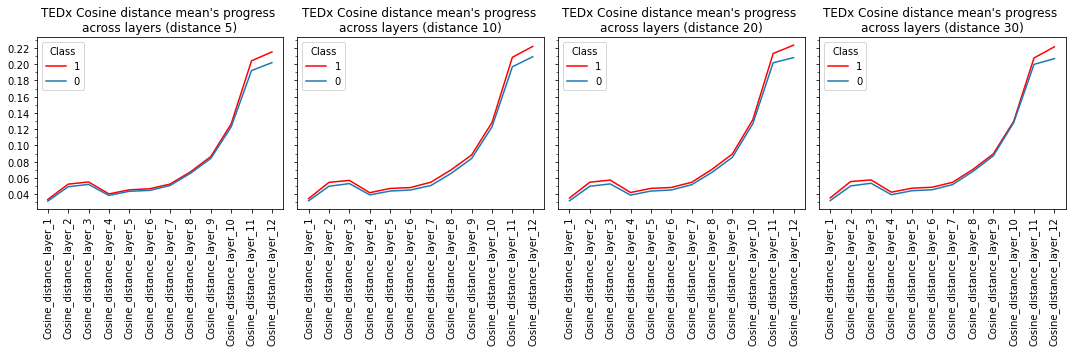

In [146]:
plot_classes_cosine_distance_progress_across_layers(df_cosine_distances_dict)

/var/folders/zr/x6zkwkj55dl2mb3rc8k8h1_h0000gn/T/ipykernel_1409/3144737584.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[n].set_xticklabels(layers, rotation=90)
/var/folders/zr/x6zkwkj55dl2mb3rc8k8h1_h0000gn/T/ipykernel_1409/3144737584.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[n].set_xticklabels(layers, rotation=90)
/var/folders/zr/x6zkwkj55dl2mb3rc8k8h1_h0000gn/T/ipykernel_1409/3144737584.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[n].set_xticklabels(layers, rotation=90)
/var/folders/zr/x6zkwkj55dl2mb3rc8k8h1_h0000gn/T/ipykernel_1409/3144737584.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[n].set_xticklabels(layers, rotation=90)


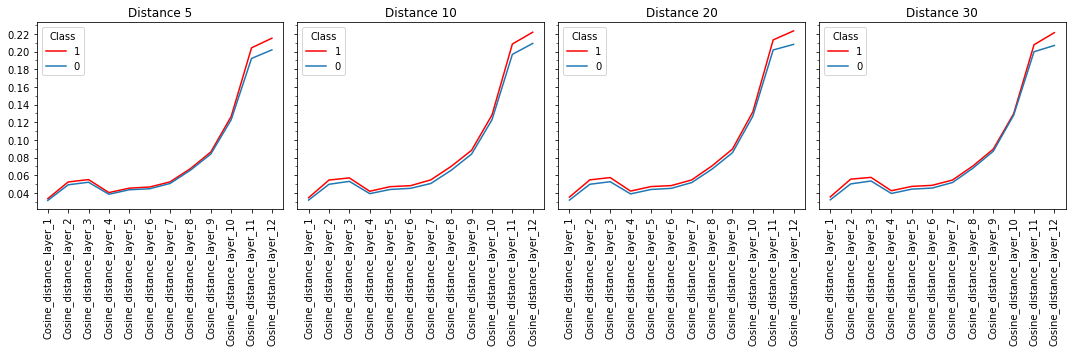

In [147]:
plot_classes_cosine_distance_progress_across_layers(df_cosine_distances_dict, 'ridotto')

In [148]:
def plot_classes_cosine_distance_progress_across_layers_con_labels_specifiche(df_cosine_distances_dict, titolo_ridotto=''):
    
    fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(15,5), sharey=True)
    
    for n, distance in enumerate(df_cosine_distances_dict):
        
        #layers
        layers = [layer for layer in df_cosine_distances_dict[distance]]
        
        #medie delle distanze coseniche per le classi
        mean_values_1 = [df_cosine_distances_dict[distance][layer]['1']['Mean'] \
                       for layer in df_cosine_distances_dict[distance]]
        
        mean_values_0 = [df_cosine_distances_dict[distance][layer]['0']['Mean'] \
                       for layer in df_cosine_distances_dict[distance]]

        ax[n].plot(layers, mean_values_1, label='Eventi non consecutivi', color= 'r')
        ax[n].plot(layers, mean_values_0, label='Eventi consecutivi')
        ax[n].legend(loc='upper left')
        title = "{} Cosine distance mean's progress \nacross layers (distance {})".format(risorsa, ''.join([i for i in distance if i.isdigit()]))
        ax[n].set_title(title)
        if titolo_ridotto:
            title = "Distance {}".format(''.join([i for i in distance if i.isdigit()]))
        ax[n].set_title(title)
        ax[n].set_xticklabels(layers, rotation=90)
        
        ax[n].yaxis.set_major_locator(MultipleLocator(0.02))
        
        ax[n].yaxis.set_minor_locator(MultipleLocator(0.01))
        
                             
    plt.tight_layout()
    
    tit = "{} Cosine distance mean's progress across layers".format(risorsa)
    
    if titolo_ridotto:
        fig.savefig(path_images_tit_ridotti + tit + '.png', dpi=fig.dpi, bbox_inches='tight')
    else:
        fig.savefig(path_images + tit + '.png', dpi=fig.dpi, bbox_inches='tight')
    
    plt.show()

/var/folders/zr/x6zkwkj55dl2mb3rc8k8h1_h0000gn/T/ipykernel_1409/3795091433.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[n].set_xticklabels(layers, rotation=90)
/var/folders/zr/x6zkwkj55dl2mb3rc8k8h1_h0000gn/T/ipykernel_1409/3795091433.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[n].set_xticklabels(layers, rotation=90)
/var/folders/zr/x6zkwkj55dl2mb3rc8k8h1_h0000gn/T/ipykernel_1409/3795091433.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[n].set_xticklabels(layers, rotation=90)
/var/folders/zr/x6zkwkj55dl2mb3rc8k8h1_h0000gn/T/ipykernel_1409/3795091433.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[n].set_xticklabels(layers, rotation=90)


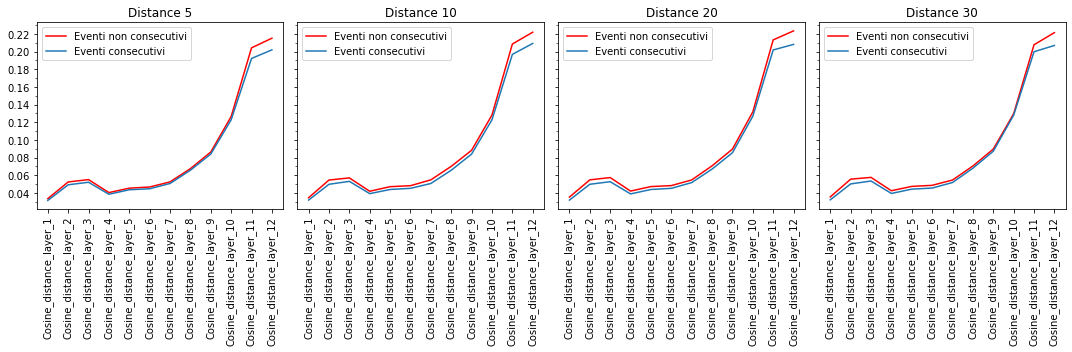

In [149]:
plot_classes_cosine_distance_progress_across_layers_con_labels_specifiche(df_cosine_distances_dict, 'ridotto')

In [150]:
df_dist_5_cosine_distance

Id                                         Sentence_1  \
0      29327  Goldman Prize, che è un po' il Nobel dell'ambi...   
1      67142  Nonostante sia stato terminato come progetto, ...   
2       9675                             Non l'aveva mai visto.   
3      16322  E in quel momento senza nessun dubbio abbiamo ...   
4      71604  I giornalisti di ProPublica, una testata inves...   
...      ...                                                ...   
2395  171348  Dietro però c'è stato un piano e c'è anche un ...   
2396  180390                                    Succede spesso.   
2397  195372  Perché dovremmo impegnarci in questa combinazi...   
2398   84571  Al contrario, in inverno, si vede la Via Latte...   
2399   16522  Pensate che alla fine degli anni Novanta si pe...   

                                             Sentence_2  Class  \
0     Se voi passeggiate per Cerro de Pasco, o per q...      1   
1     In più, si prestano benissimo questi moduli ad...      1   
2     Se l'era immaginato tante volte ma anche adess...      0   
3     Vedete, in quel momento ho capito una cosa mol...      0   
4     Ora, come non è vero che i miei capelli rossi ...      0   
...                                                 ...    ...   
2395  Tra parentesi, la settimana scorsa vari sondag...      1   
2396  Se sanguino, ovviamente la medicazione la fa l...      0   
2397  Perché impegnarci in questa combinazione di sk...      1   
2398  Presenta meno colori, meno forme e soprattutto...      0   
2399  In realtà si è capito che eravamo solo all'ini...      0   

      Cosine_distance_layer_1  Cosine_distance_layer_2  \
0                      0.0415                   0.0555   
1                      0.0232                   0.0432   
2                      0.0289                   0.0407   
3                      0.0283                   0.0393   
4                      0.0246                   0.0530   
...                       ...                      ...   
2395                   0.0159                   0.0385   
2396                   0.0737                   0.0907   
2397                   0.0145                   0.0255   
2398                   0.0173                   0.0248   
2399                   0.0171                   0.0323   

      Cosine_distance_layer_3  Cosine_distance_layer_4  \
0                      0.0657                   0.0468   
1                      0.0322                   0.0201   
2                      0.0562                   0.0422   
3                      0.0403                   0.0317   
4                      0.0436                   0.0352   
...                       ...                      ...   
2395                   0.0336                   0.0215   
2396                   0.1072                   0.0771   
2397                   0.0336                   0.0289   
2398                   0.0216                   0.0166   
2399                   0.0546                   0.0407   

      Cosine_distance_layer_5  Cosine_distance_layer_6  \
0                      0.0447                   0.0380   
1                      0.0216                   0.0274   
2                      0.0472                   0.0450   
3                      0.0348                   0.0348   
4                      0.0448                   0.0422   
...                       ...                      ...   
2395                   0.0198                   0.0153   
2396                   0.1044                   0.0889   
2397                   0.0395                   0.0422   
2398                   0.0189                   0.0176   
2399                   0.0385                   0.0383   

      Cosine_distance_layer_7  Cosine_distance_layer_8  \
0                      0.0394                   0.0483   
1                      0.0260                   0.0297   
2                      0.0654                   0.0697   
3                      0.0376                   0.0537   
4                      0.0509  

In [23]:
def plot_mean_and_stdev(df):
    
    for layer in range(1,13):
        
        fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
        
        for cl in [0, 1]:
            
            sns.distplot(df[df['Class'] == cl]['Cosine_distance_layer_{}'.format(layer)], \
                        bins = 'auto', hist=True, hist_kws={'edgecolor' : 'k', 'color':'c', 'alpha':0.3}, \
                         ax=ax[cl], fit=norm, kde_kws={'lw':2, 'label':'KDE', 'color':'red'}, \
                         fit_kws={'label':'Normal distribution', 'color':'blue'})

            m = statistics.mean(df[df['Class'] == cl]['Cosine_distance_layer_{}'.format(layer)])
            sd = statistics.stdev(df[df['Class'] == cl]['Cosine_distance_layer_{}'.format(layer)])
            print("Mean: %.4f" %m)
            print("StDev: %.4f" %sd)
            ax[cl].axvline(m, color = 'k', linestyle='dashed', label='Mean')
            ax[cl].axvline(m + sd, color='orange', linestyle='dashed', label='Mean ± stdev')
            ax[cl].axvline(m - sd, color='orange', linestyle='dashed')

            handles, labels = ax[cl].get_legend_handles_labels()
            ax[cl].legend(handles, labels, title = "Mean and stdev")
            
            ax[cl].set_title("{} Layer {} mean and standard deviation of class {} ({})".format(risorsa, layer, cl, \
                                                                            "Non segue" if cl == 1 else "Segue"))
            
            ax[cl].set_xlabel("Cosine distances")
            
        
        plt.tight_layout()
        plt.show()

In [24]:
def plot_mean_and_stdev_vecchio(df):
        
    for layer in range(1,13):
        
        ax[0] = sns.displot(df, x=df['Cosine_distance_layer_{}'.format(layer)], \
                    bins = 'auto', kde=True, edgecolor= 'k', color='c', alpha=0.3, \
                   )

        
        m = statistics.mean(df['Cosine_distance_layer_{}'.format(layer)])
        sd = statistics.stdev(df['Cosine_distance_layer_{}'.format(layer)])
        print("Mean: %.4f" %m)
        print("StDev: %.4f" %sd)
        ax[0].axvline(m, color = 'k', linestyle='dashed', label='Mean')
        ax[0].axvline(m + sd, color='orange', linestyle='dashed', label='Mean ± stdev')
        ax[0].axvline(m - sd, color='orange', linestyle='dashed')

        handles, labels = ax[0].get_legend_handles_labels()
        ax[0].legend(handles, labels, title = "Mean and stdev")
        

        ax[0].set_title("{} Layer {} mean and standard deviation of class {} ({})".format(risorsa, layer, cl, \
                                                                        "Non segue" if cl == 1 else "Segue"))

        ax[0].set_xlabel("Cosine distances")
        
        #sns.displot(data=df, x=df['Cosine_distance_layer_1'], kind='kde', hue='Class', ax=ax[1])
            
        
        plt.tight_layout()
        plt.show()

In [25]:
def plot_mean_and_standard_deviation(df, stat, color):
    
    for layer in range(1,13):
        g = sns.displot(df, x=df['Cosine_distance_layer_{}'.format(layer)], \
                    bins = 'auto', kde=True, col='Class', stat=stat, color=color)
        
        diz_c_mean = {'cornflowerblue': 'deeppink',
                     'darkorange': 'darkolivegreen',
                      'purple': 'darkorange',
                      'orangered': 'blue'
                     }
        def stats(x, **kwargs):
            plt.axvline(statistics.mean(x), c='k', ls='dashed', label='Mean')
            plt.axvline(statistics.mean(x) + statistics.stdev(x), c=diz_c_mean[color], ls='dashed', label='Mean ± stdev')
            plt.axvline(statistics.mean(x) - statistics.stdev(x), c=diz_c_mean[color], ls='dashed')

        g.map(stats,'Cosine_distance_layer_{}'.format(layer))
        plt.legend(bbox_to_anchor=(1.4, 1))
    plt.show()

### Count

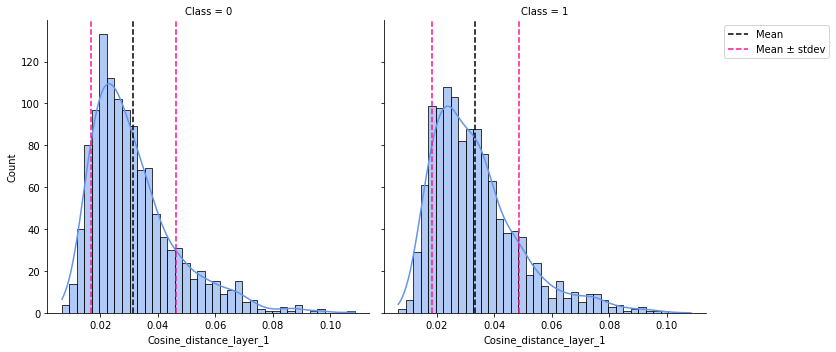

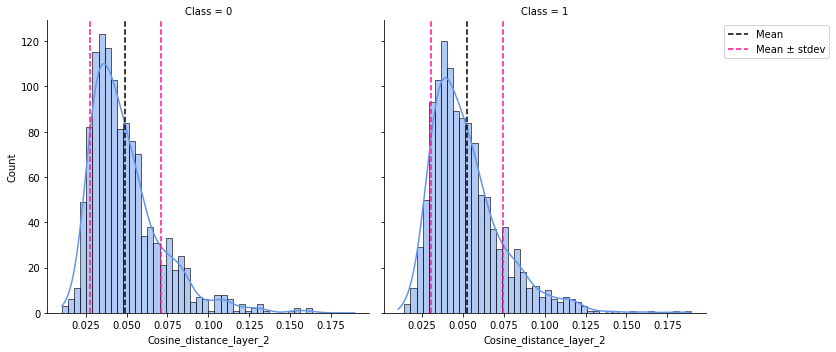

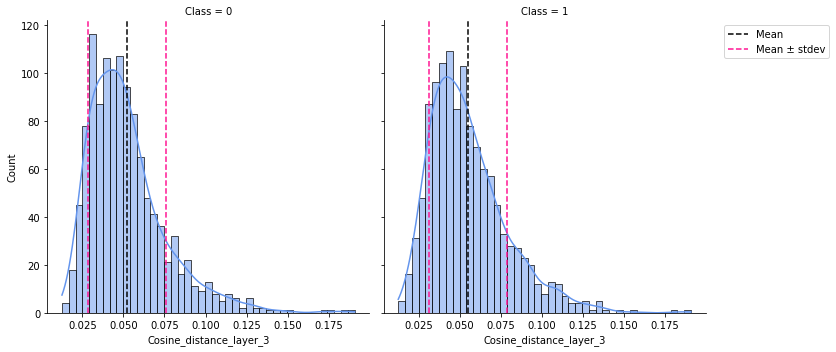

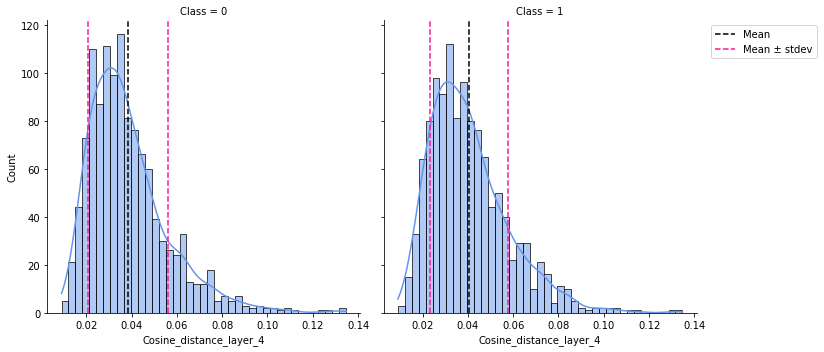

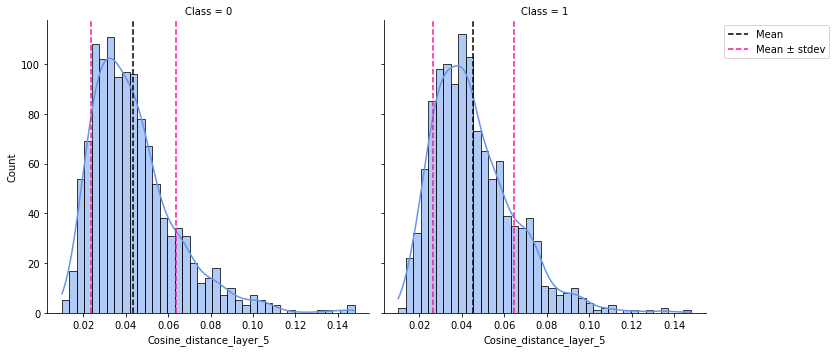

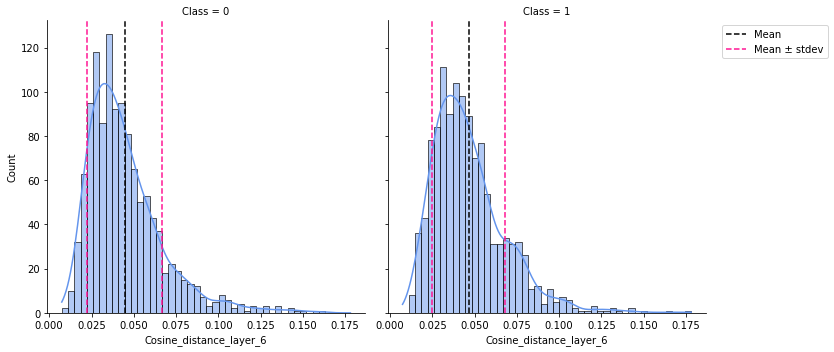

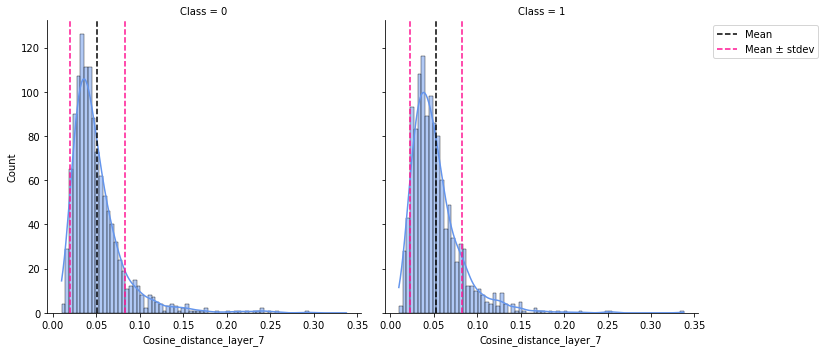

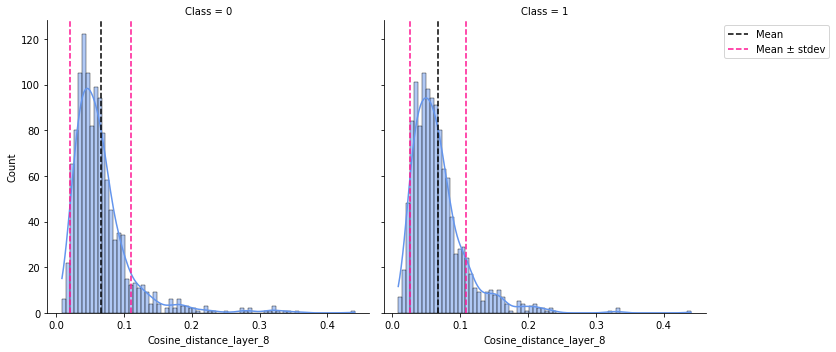

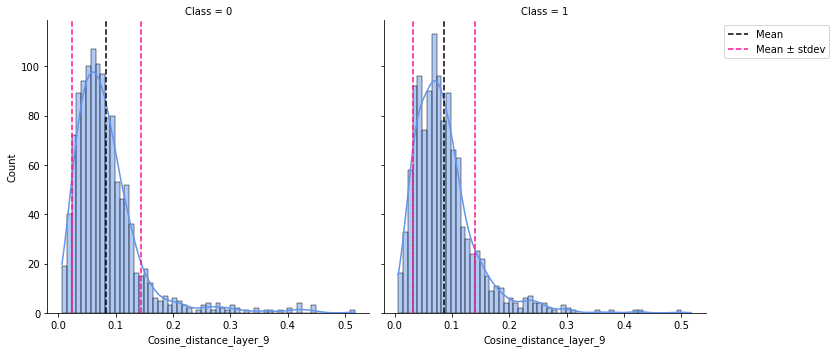

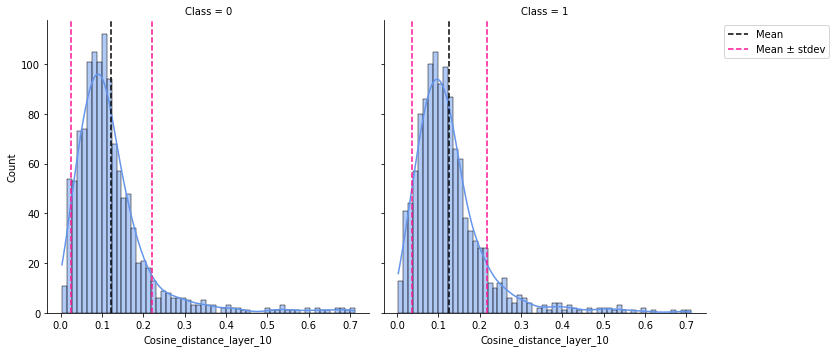

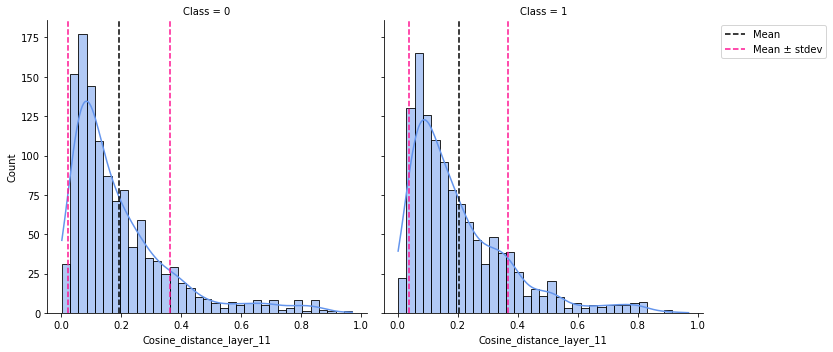

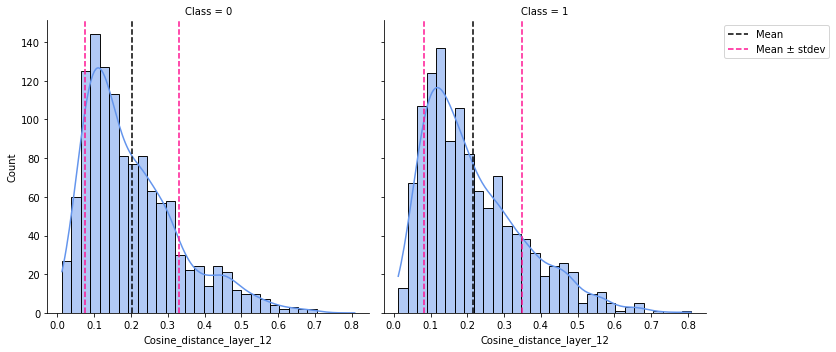

In [26]:
plot_mean_and_standard_deviation(df_dist_5_cosine_distance, 'count', 'cornflowerblue')

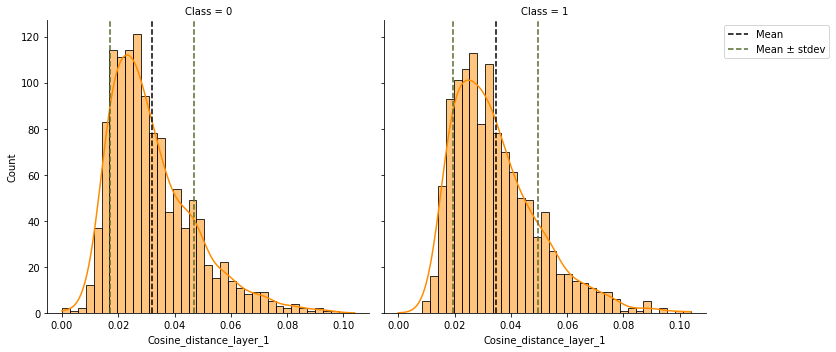

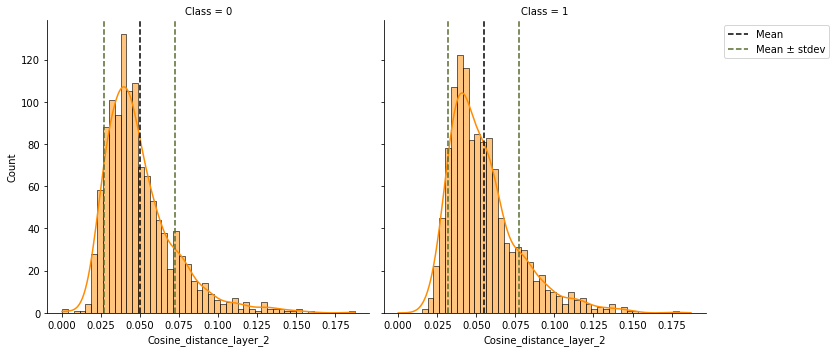

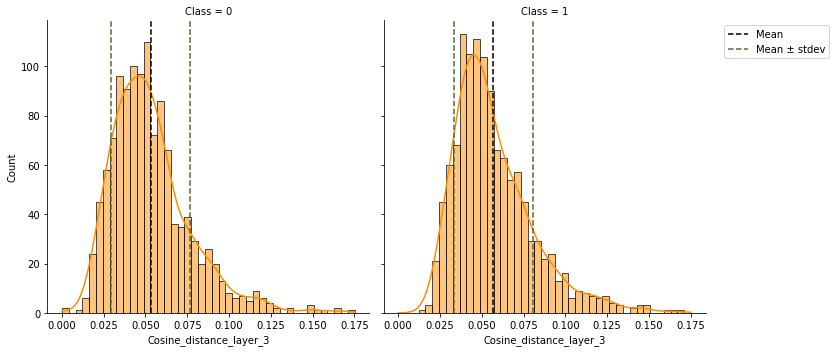

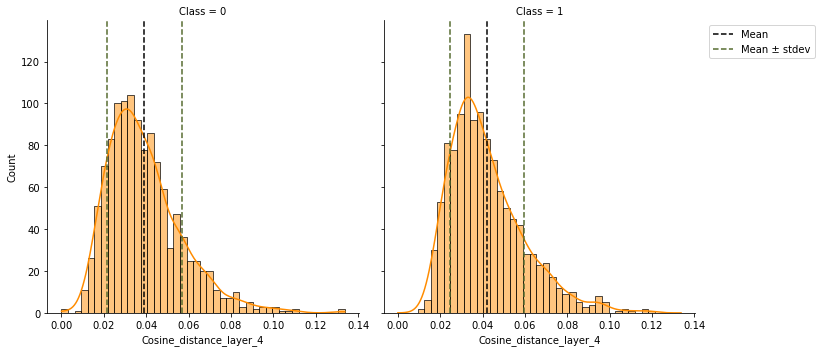

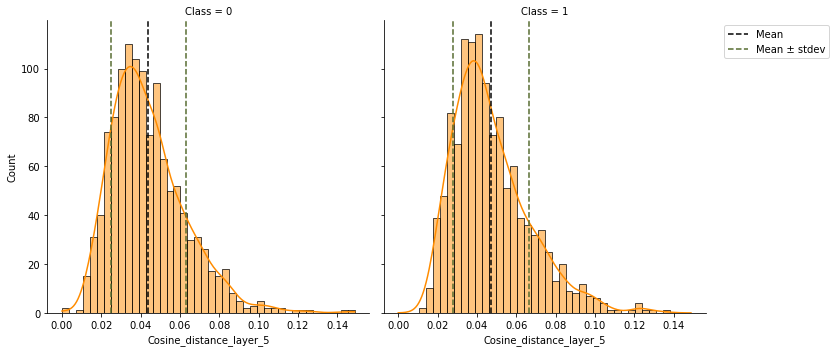

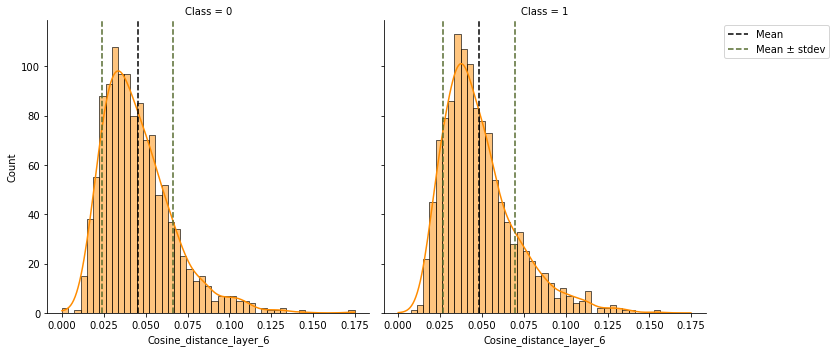

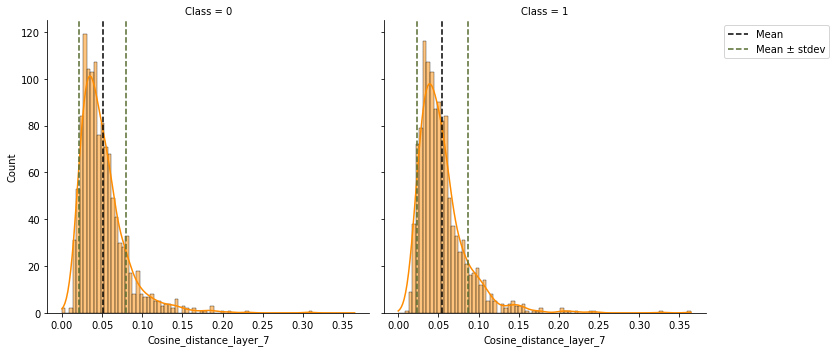

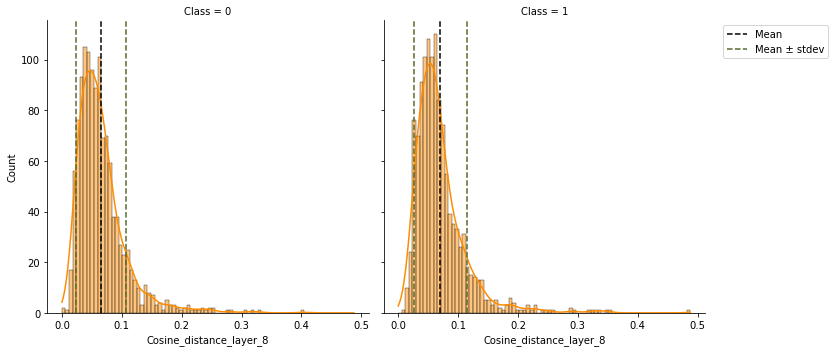

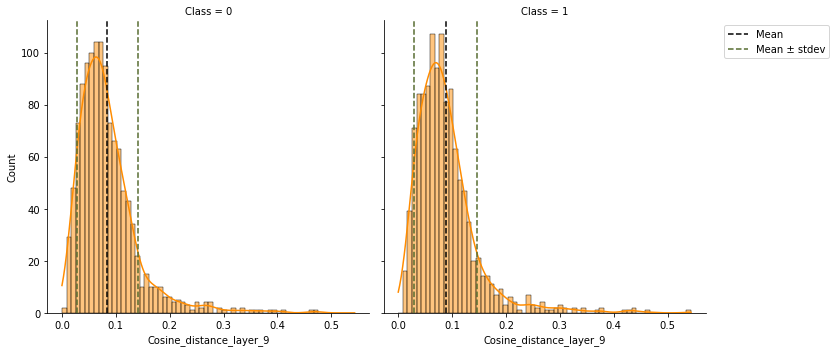

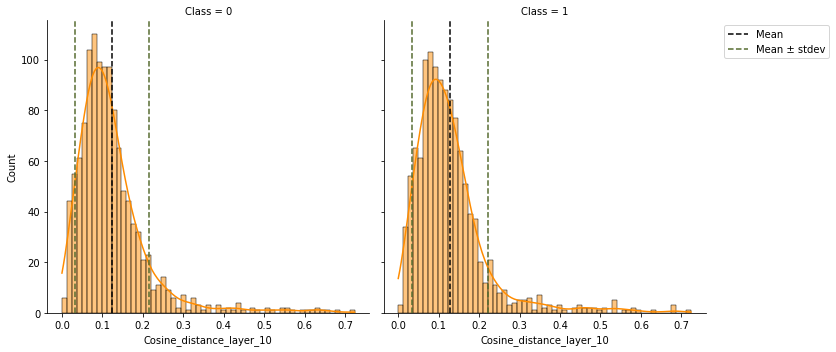

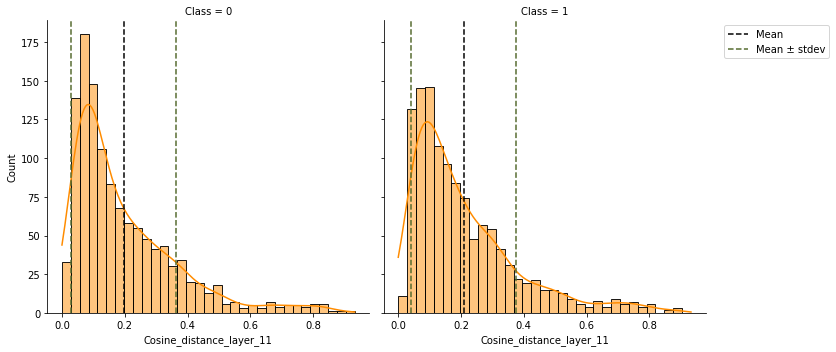

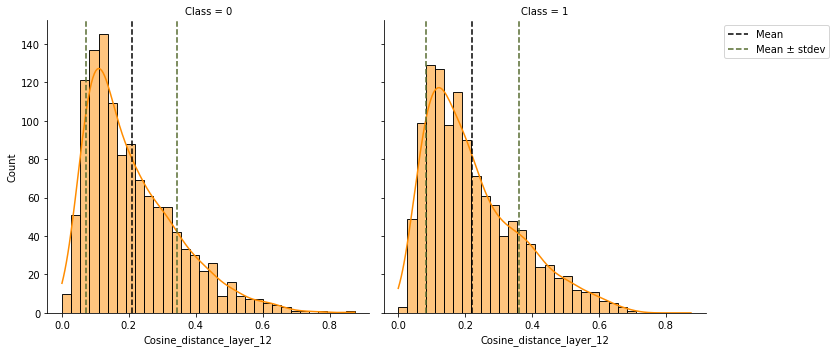

In [27]:
plot_mean_and_standard_deviation(df_dist_10_cosine_distance, 'count', 'darkorange')

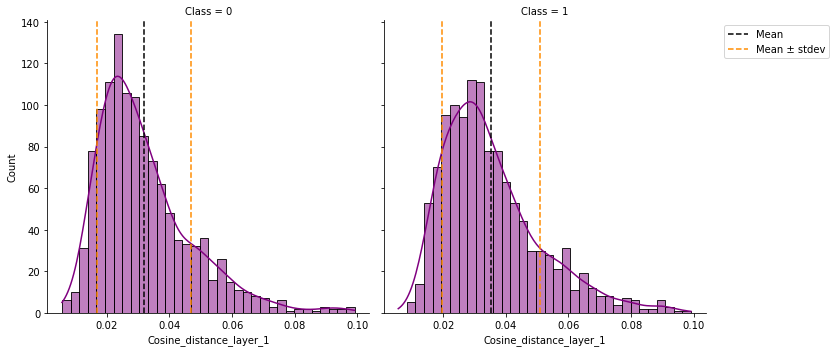

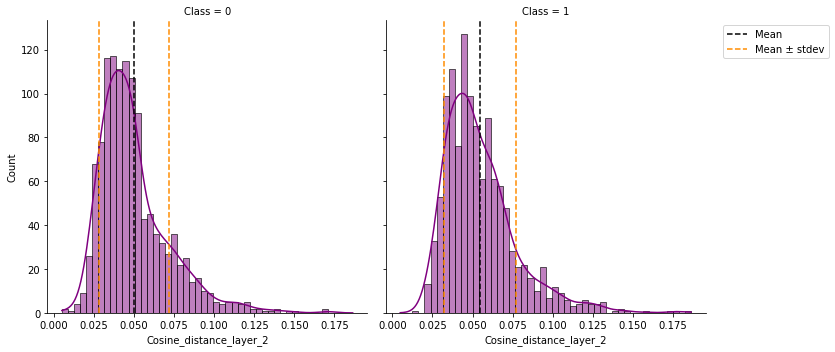

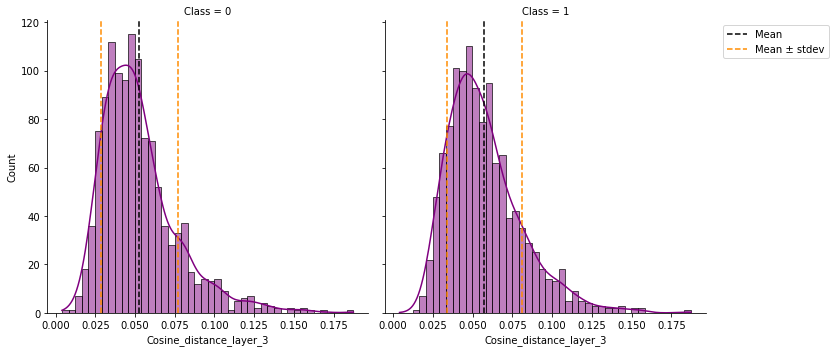

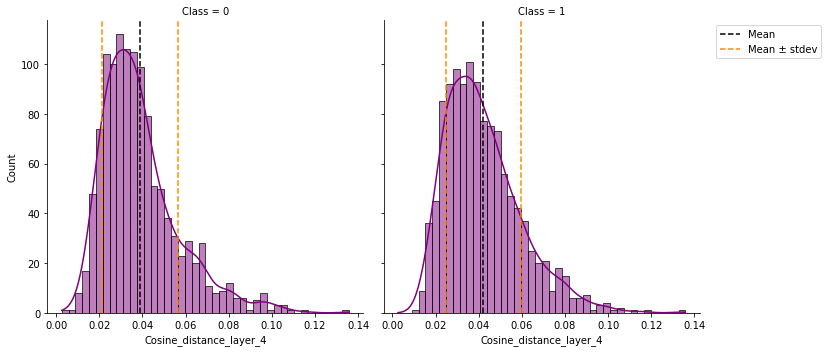

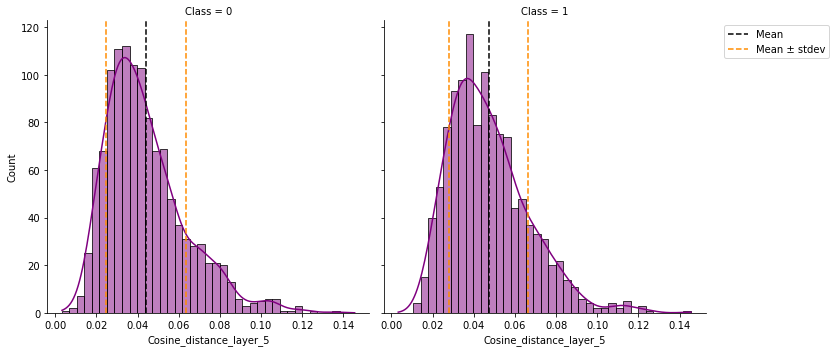

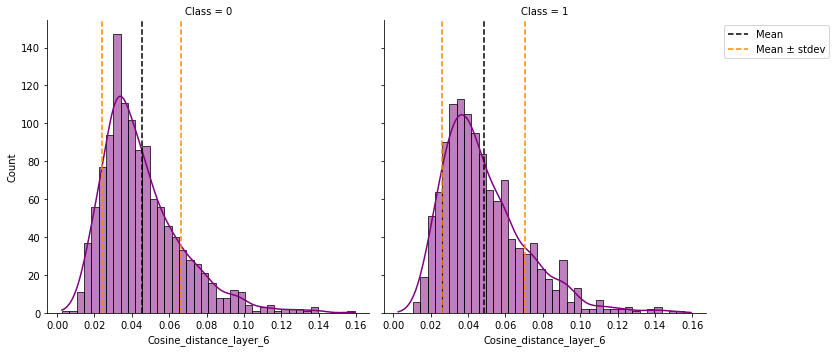

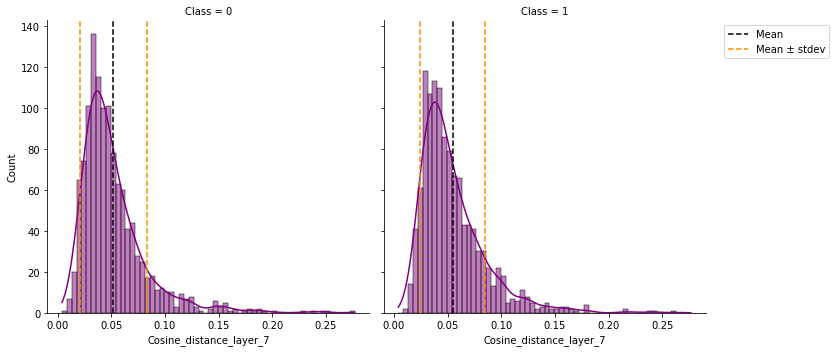

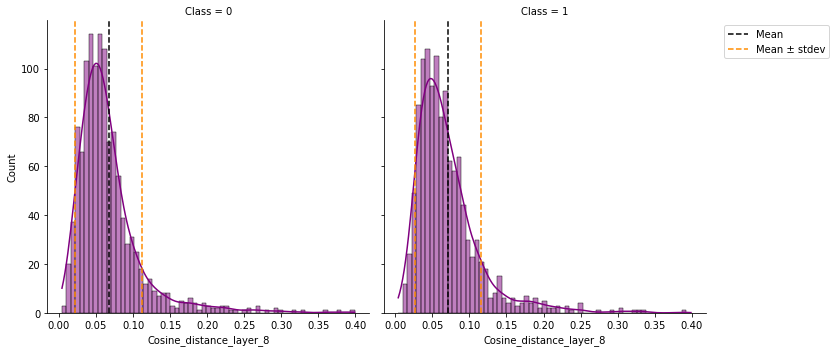

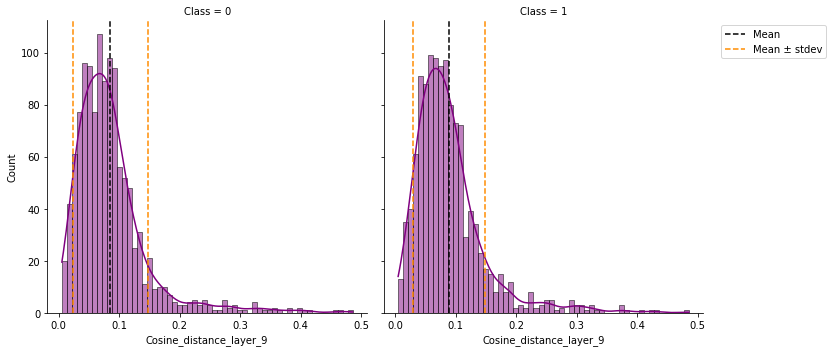

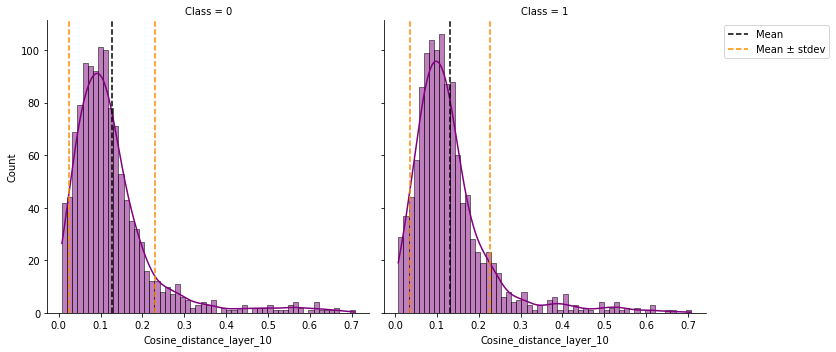

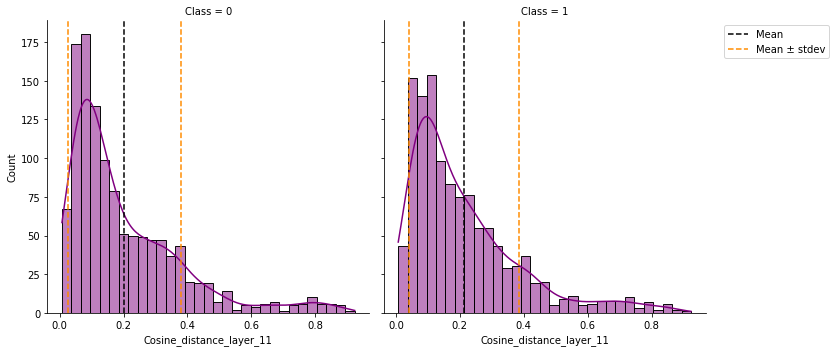

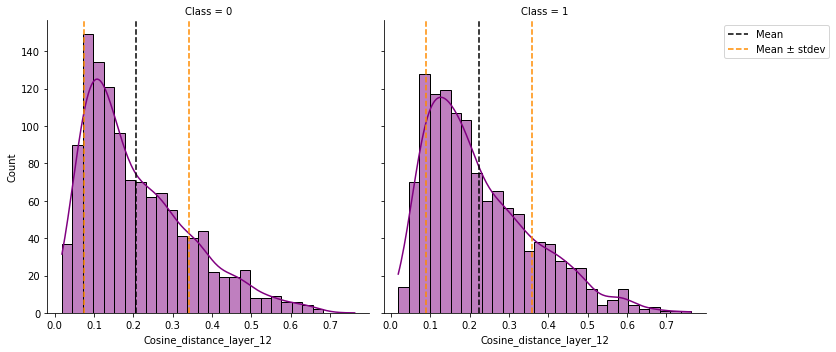

In [28]:
plot_mean_and_standard_deviation(df_dist_20_cosine_distance, 'count', 'purple')

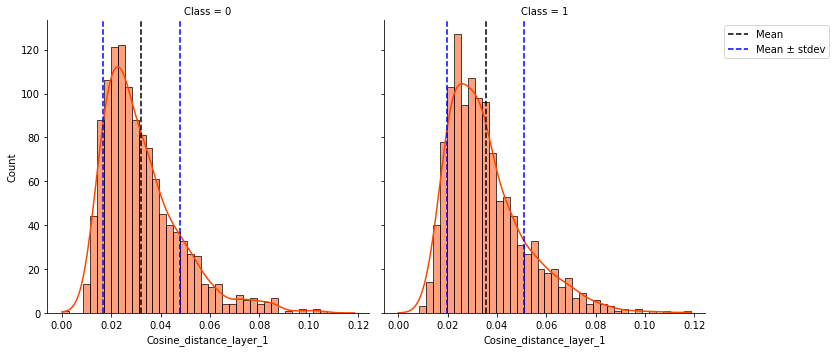

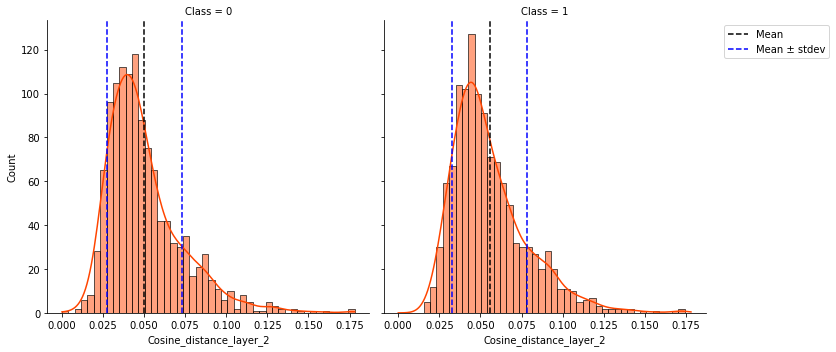

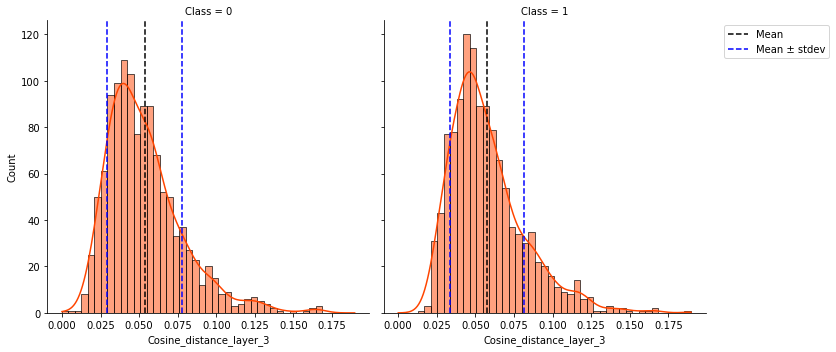

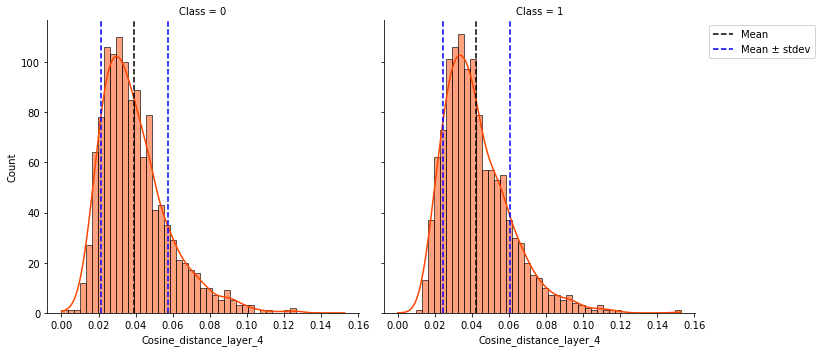

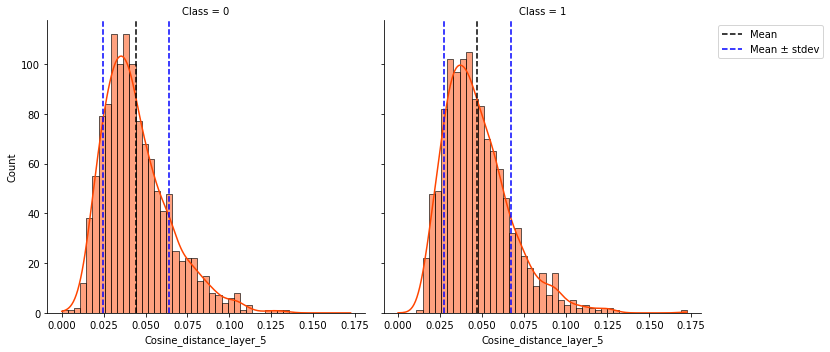

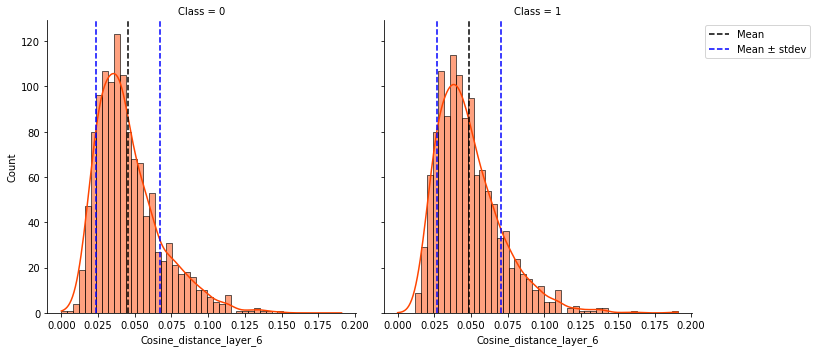

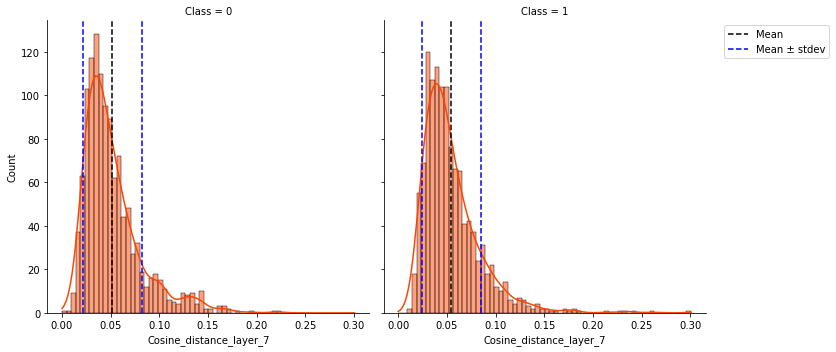

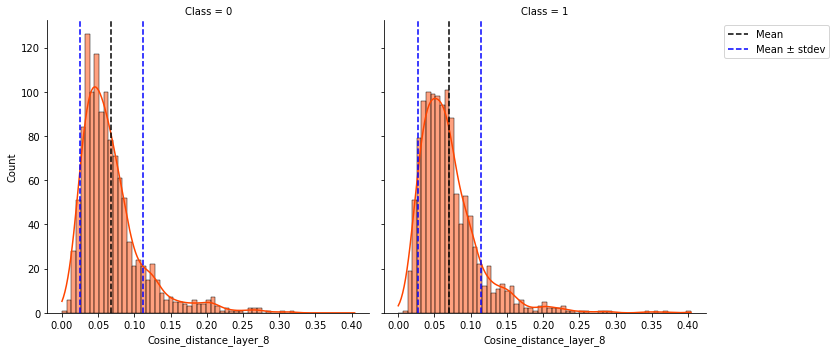

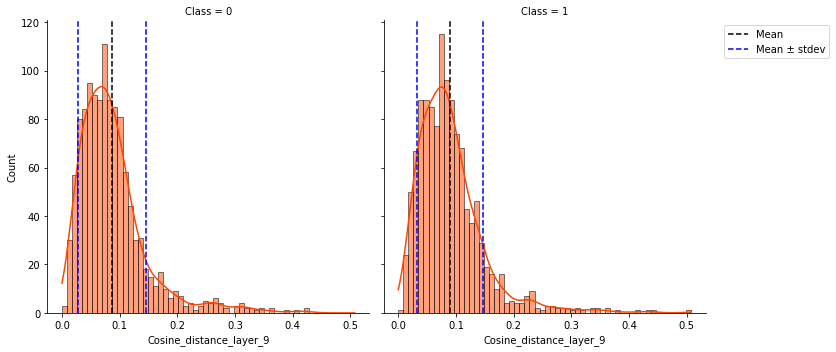

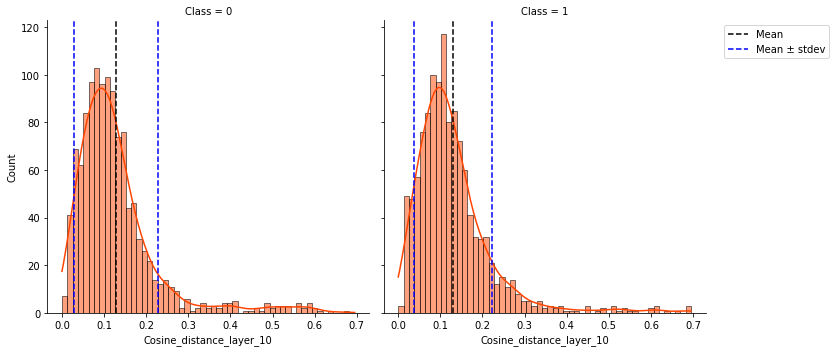

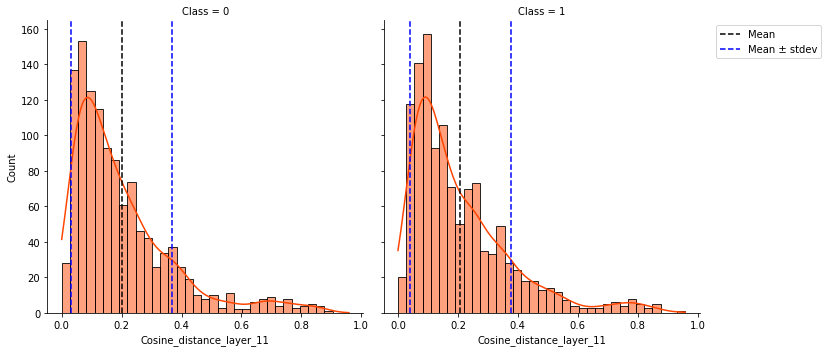

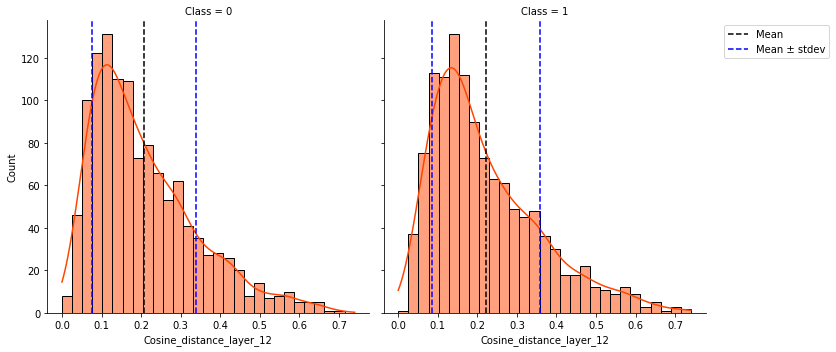

In [29]:
plot_mean_and_standard_deviation(df_dist_30_cosine_distance, 'count', 'orangered')

### Density

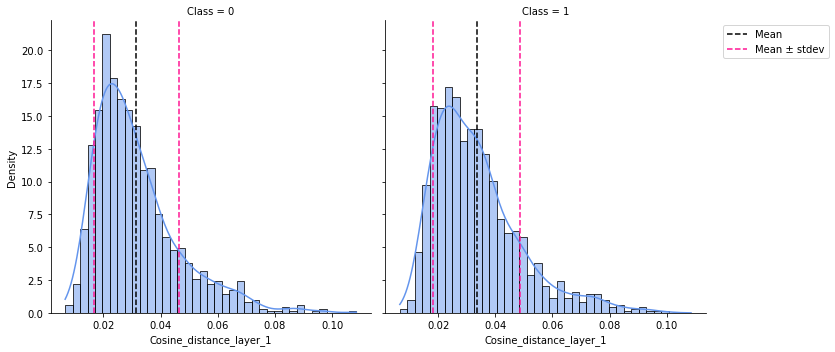

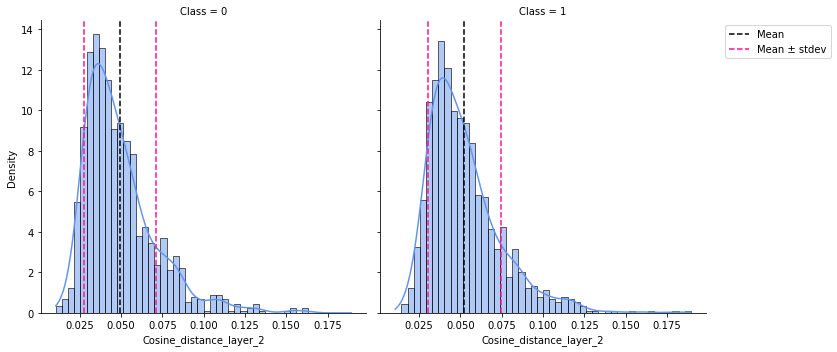

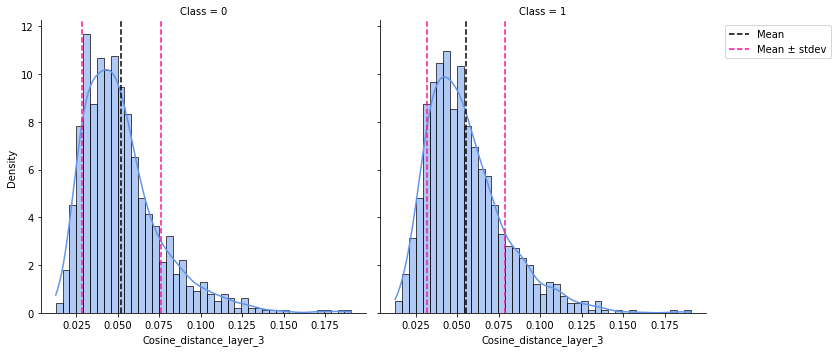

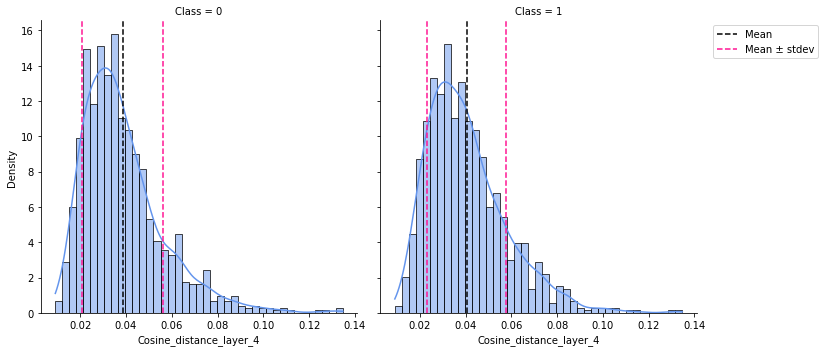

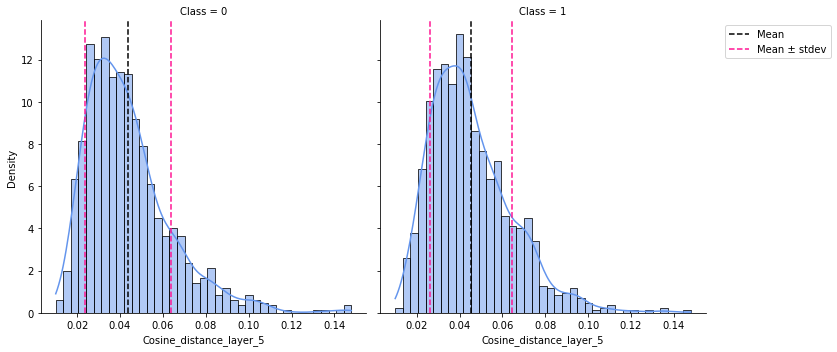

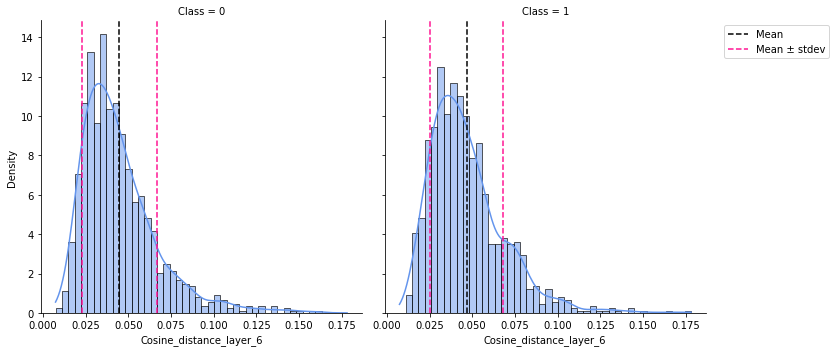

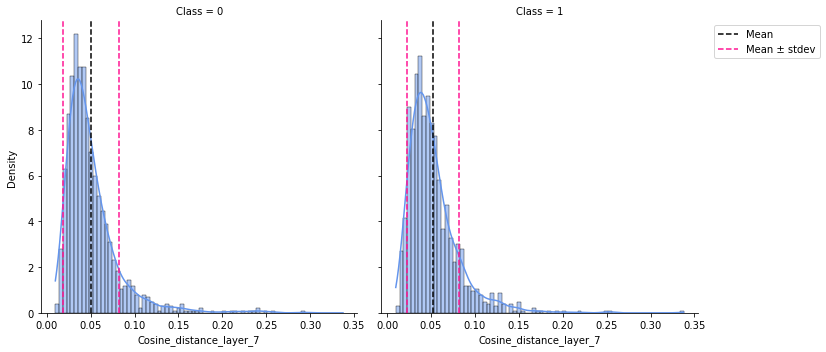

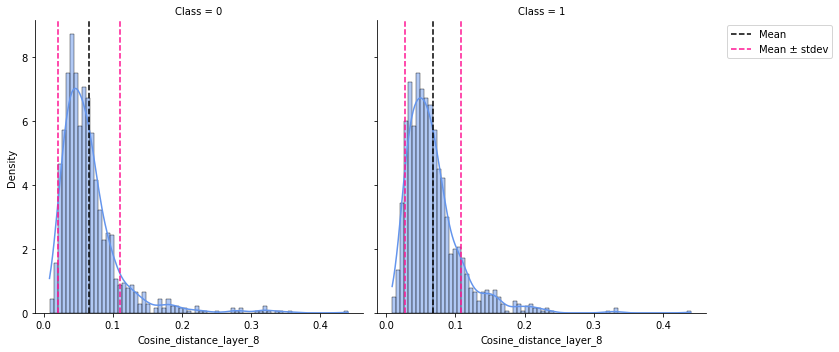

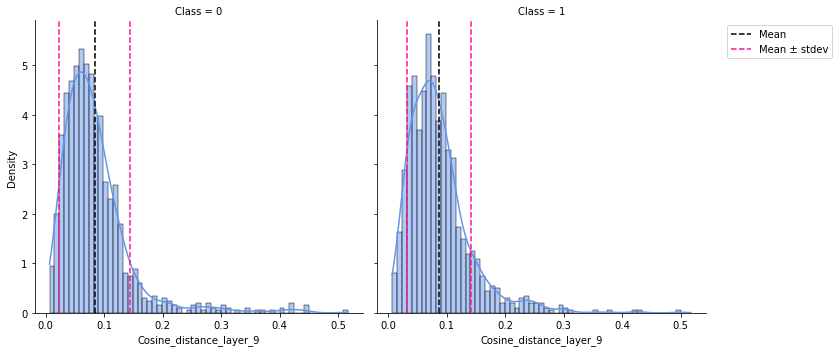

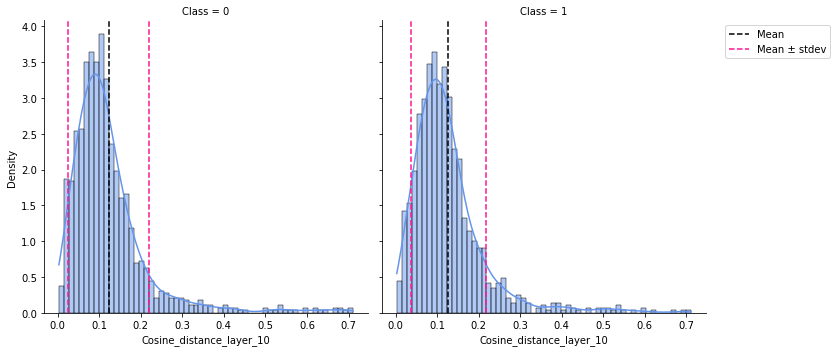

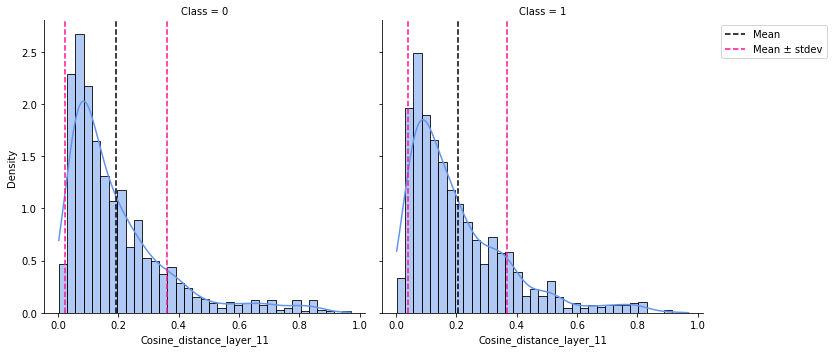

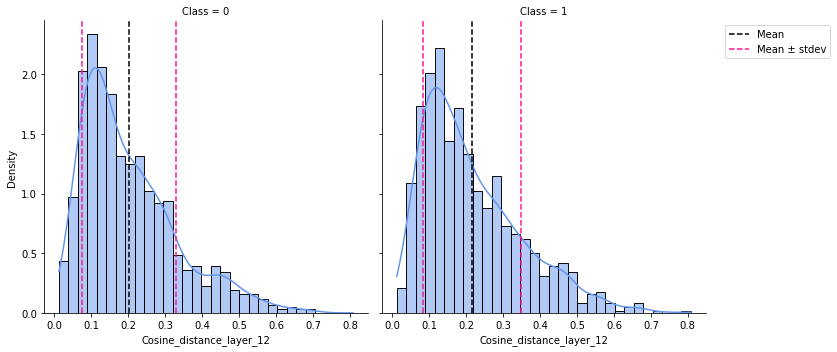

In [30]:
plot_mean_and_standard_deviation(df_dist_5_cosine_distance, 'density', 'cornflowerblue')

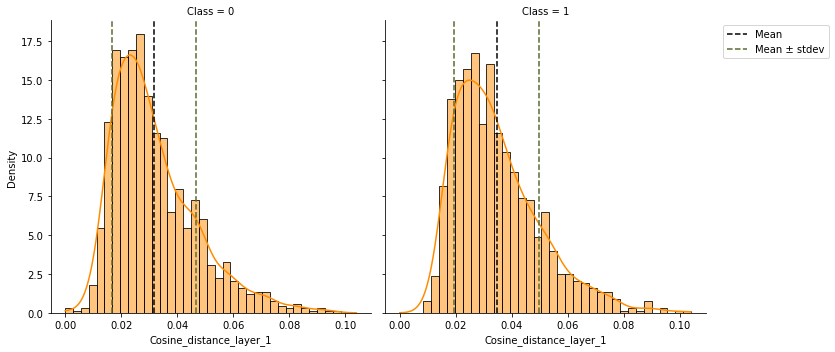

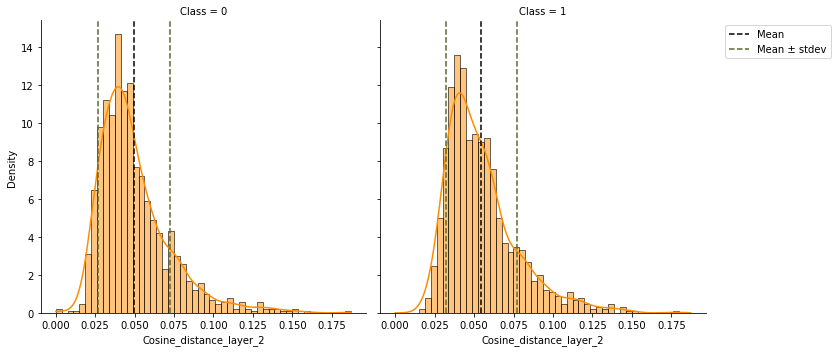

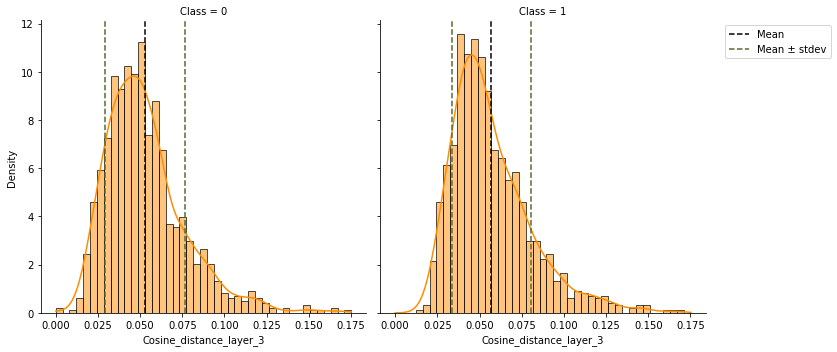

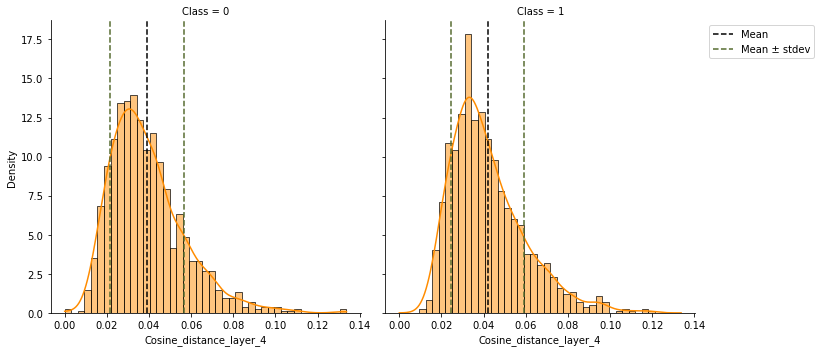

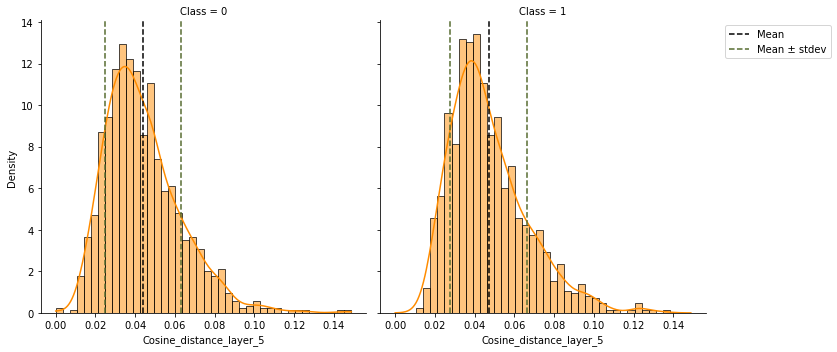

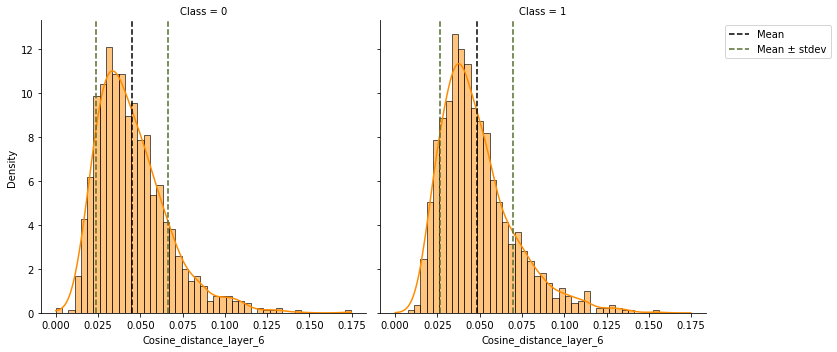

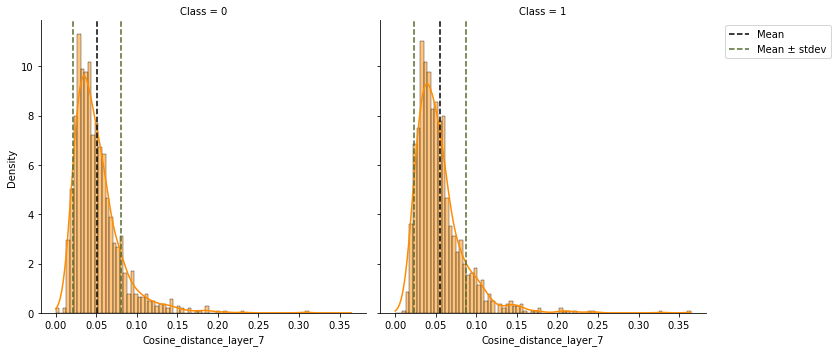

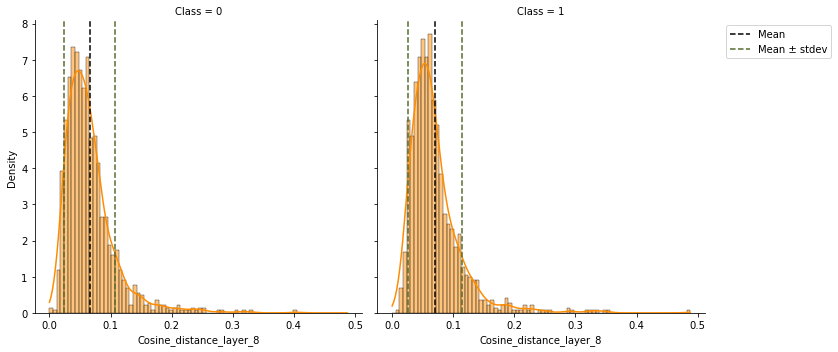

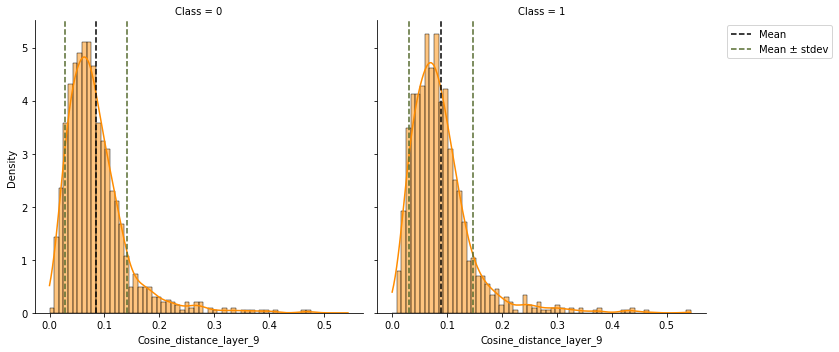

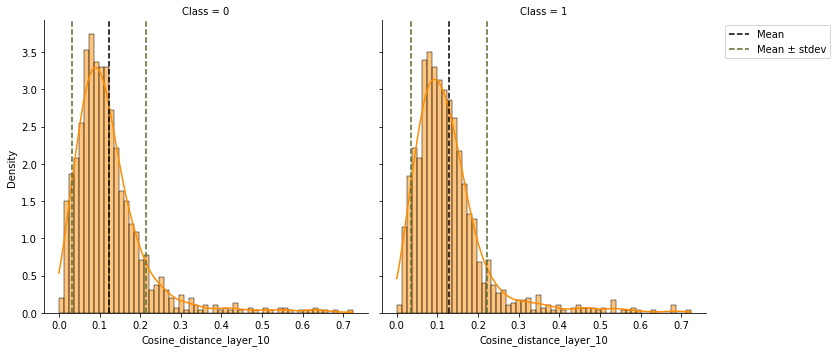

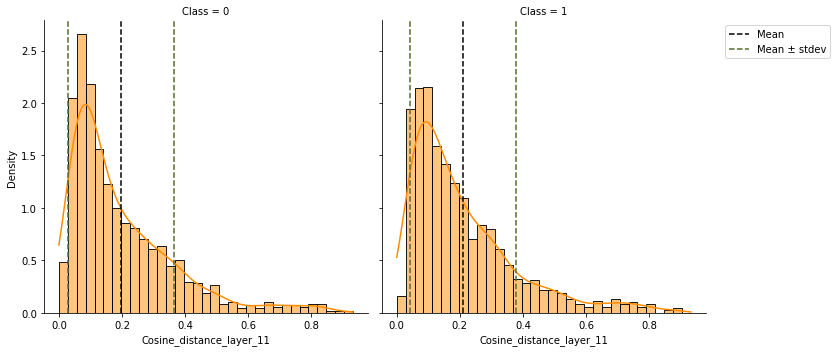

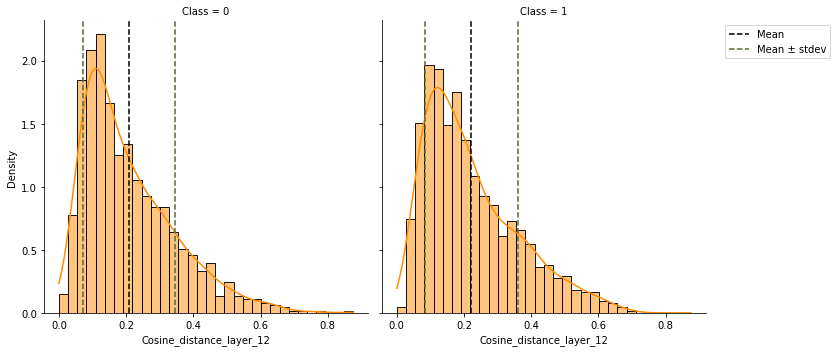

In [31]:
plot_mean_and_standard_deviation(df_dist_10_cosine_distance, 'density', 'darkorange')

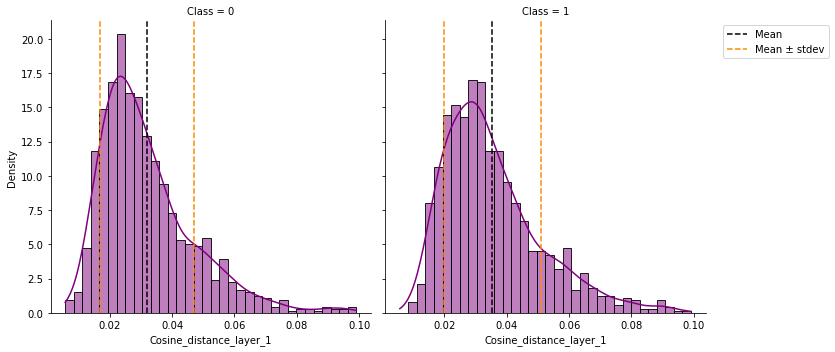

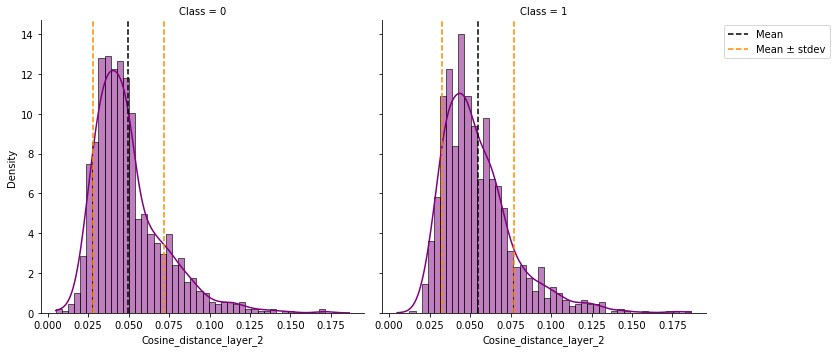

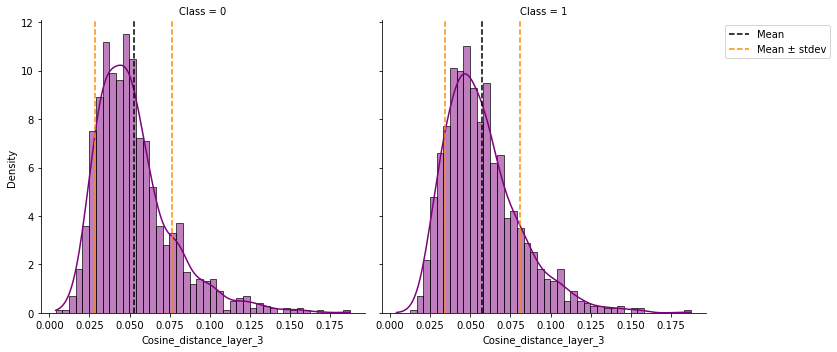

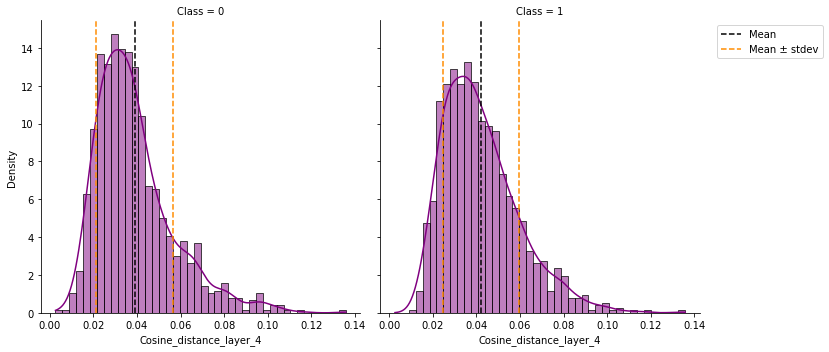

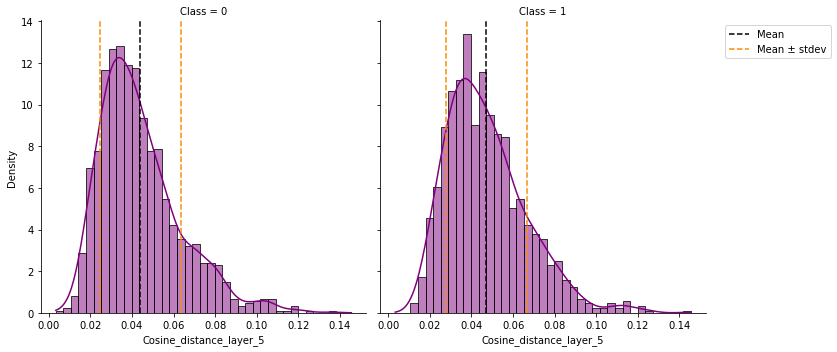

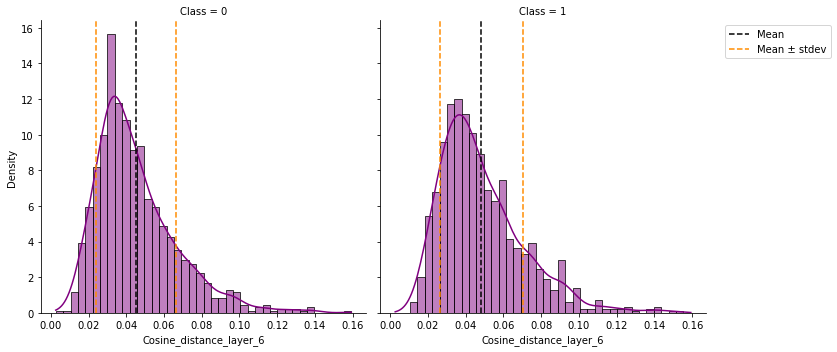

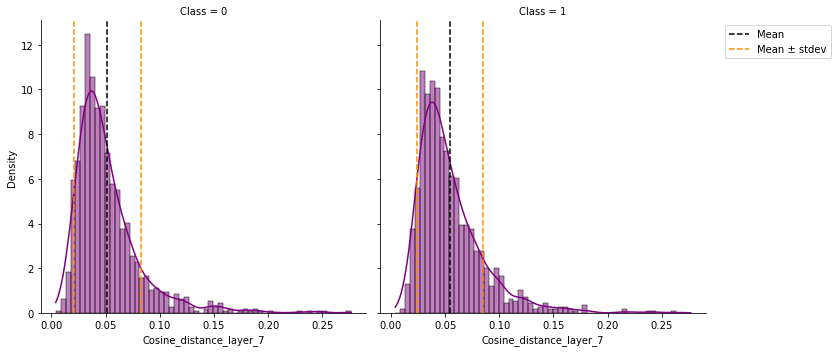

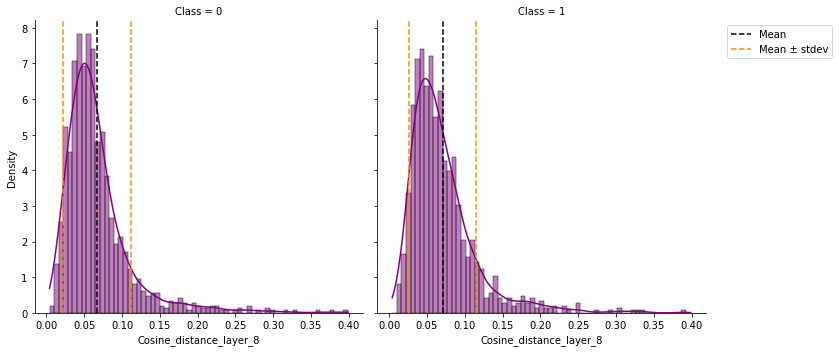

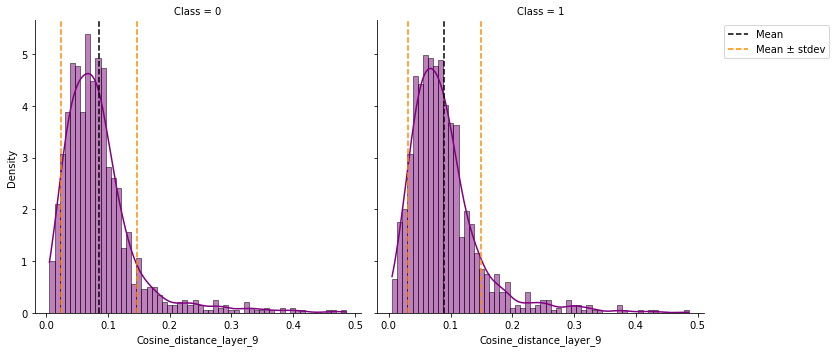

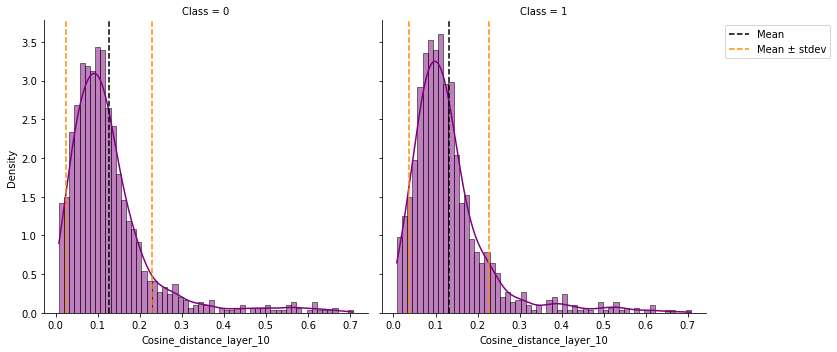

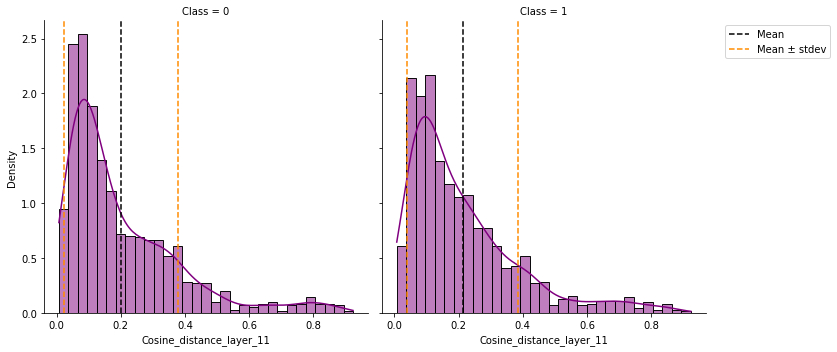

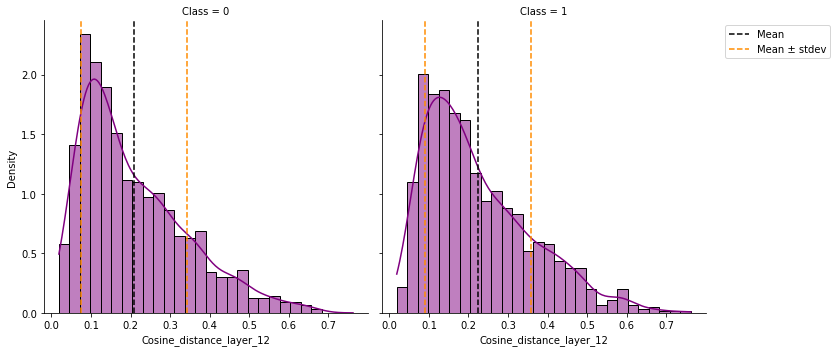

In [32]:
plot_mean_and_standard_deviation(df_dist_20_cosine_distance, 'density', 'purple')

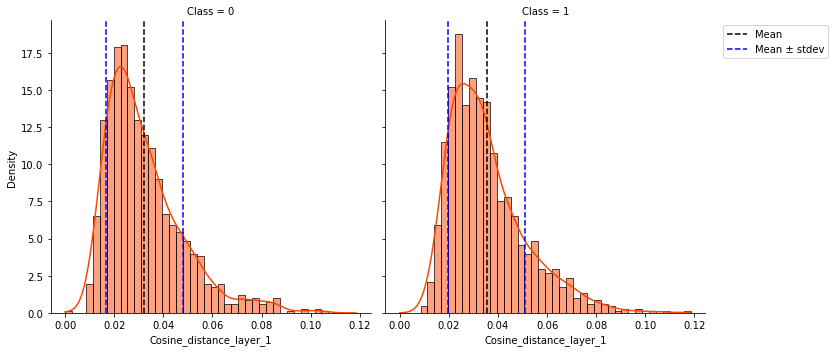

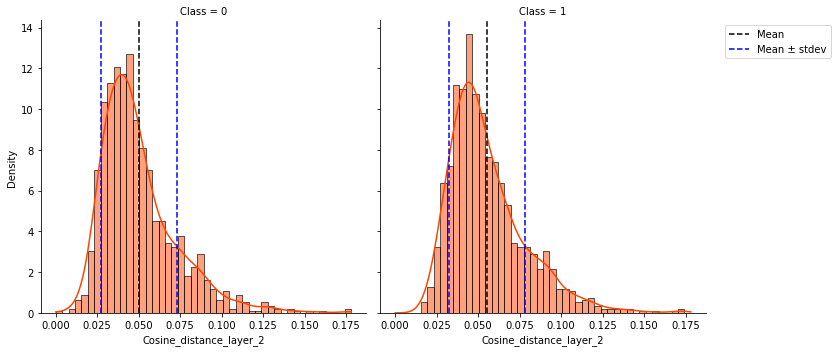

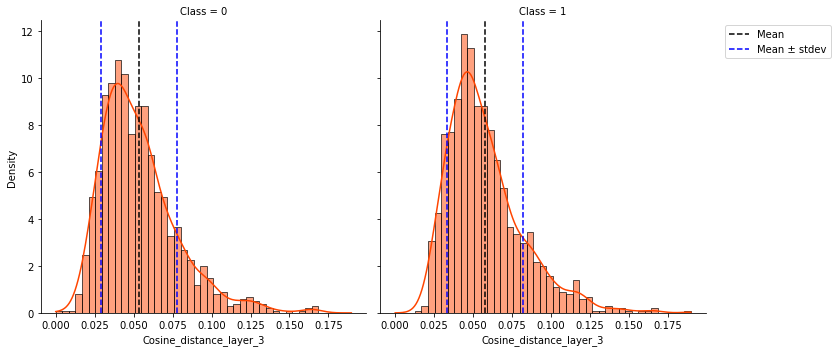

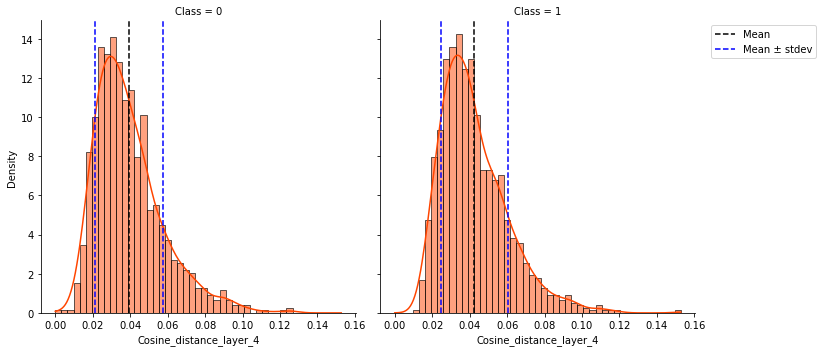

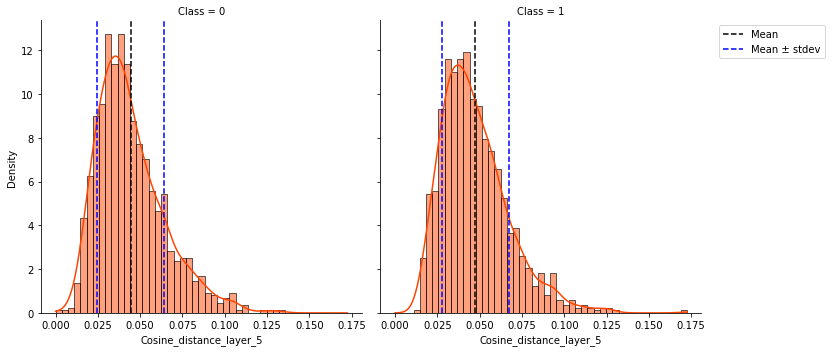

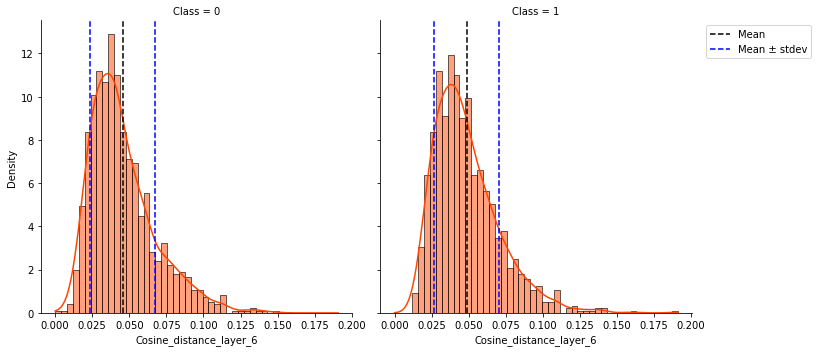

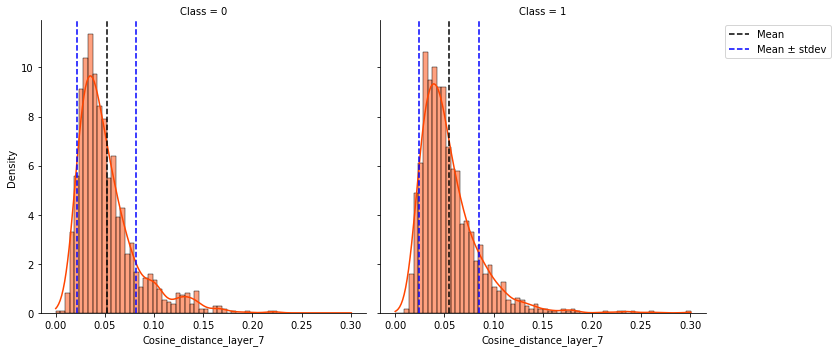

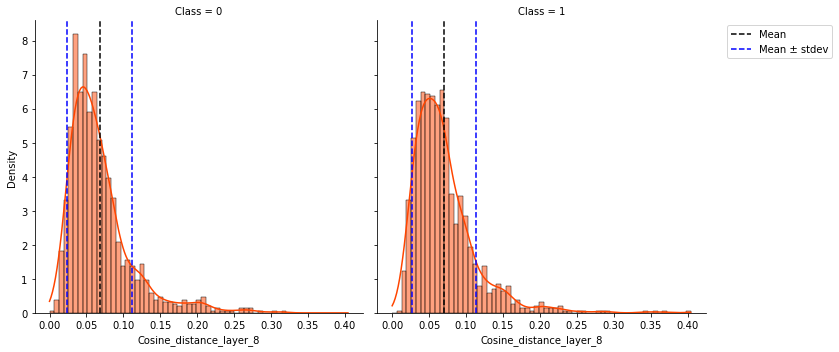

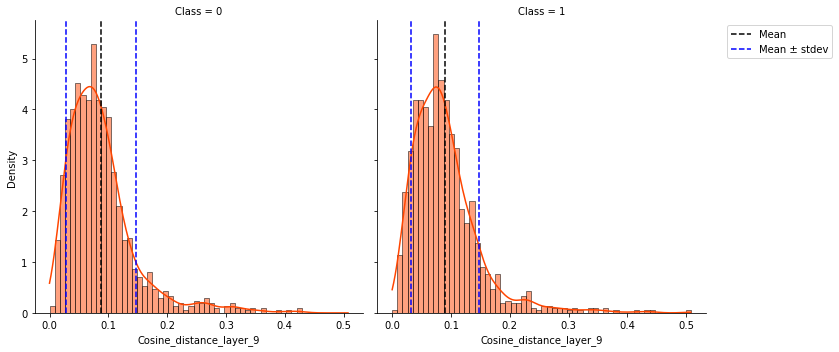

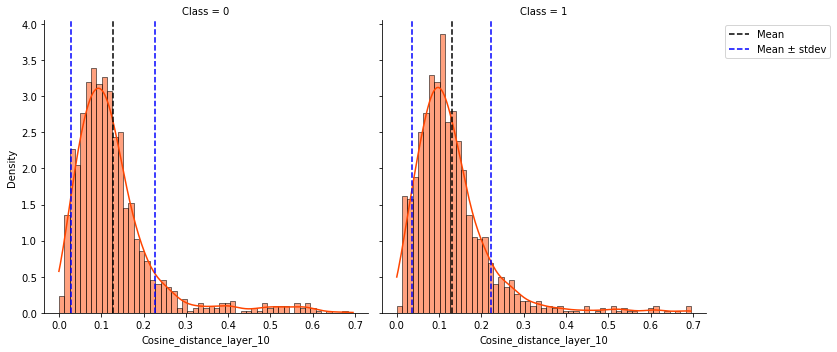

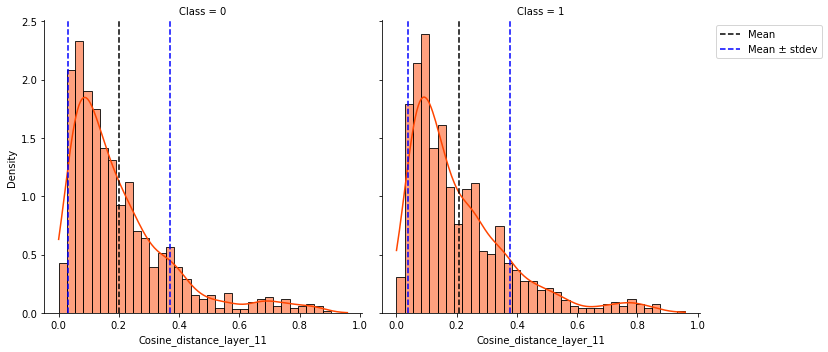

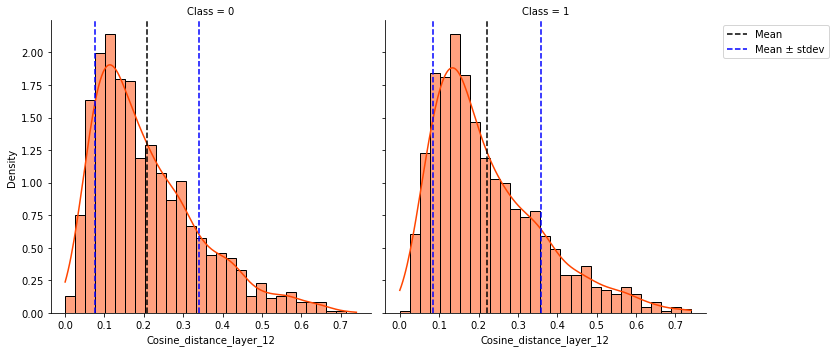

In [33]:
plot_mean_and_standard_deviation(df_dist_30_cosine_distance, 'density', 'orangered')

In [34]:
#sns.displot(data=df_dist_5_cosine_distance, x=df_dist_5_cosine_distance['Cosine_distance_layer_1'], \
#            kind='kde', hue='Class')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0315
StDev: 0.0149
Mean: 0.0335
StDev: 0.0152


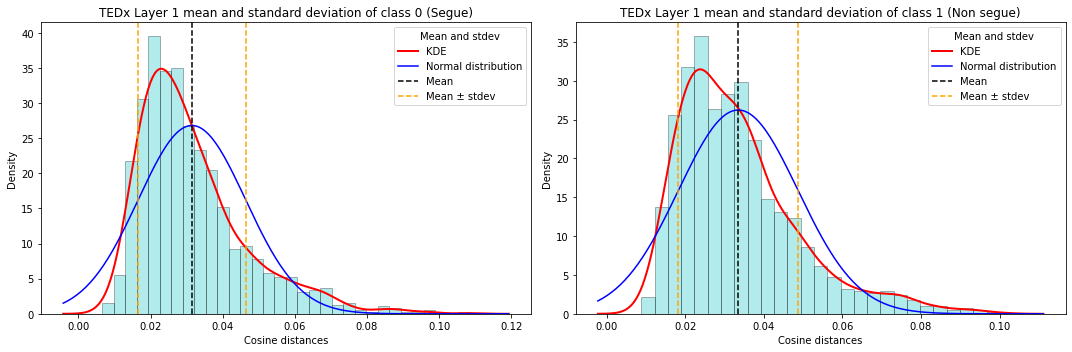

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0492
StDev: 0.0217
Mean: 0.0524
StDev: 0.0220


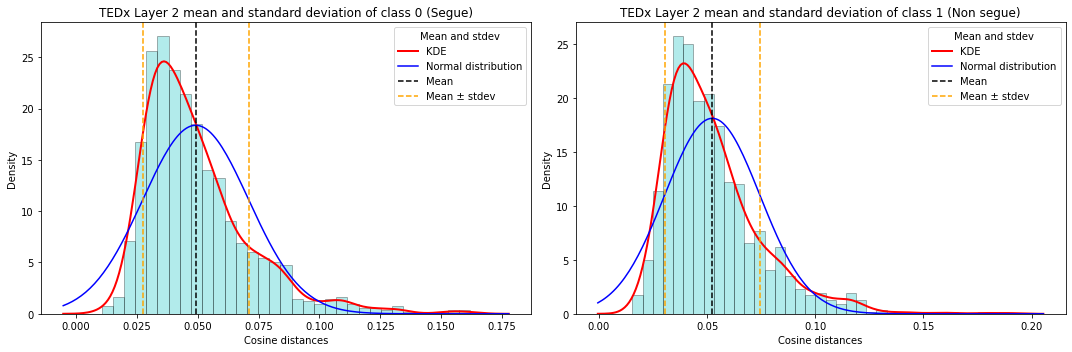

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0521
StDev: 0.0237
Mean: 0.0551
StDev: 0.0235


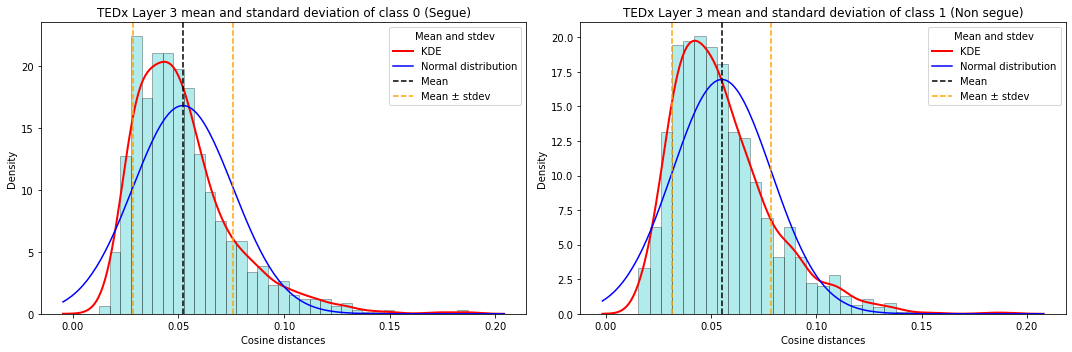

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0385
StDev: 0.0177
Mean: 0.0404
StDev: 0.0173


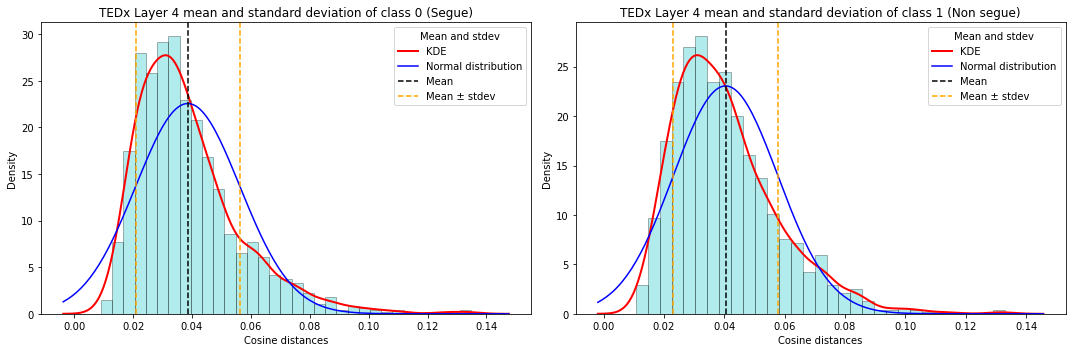

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0436
StDev: 0.0199
Mean: 0.0454
StDev: 0.0191


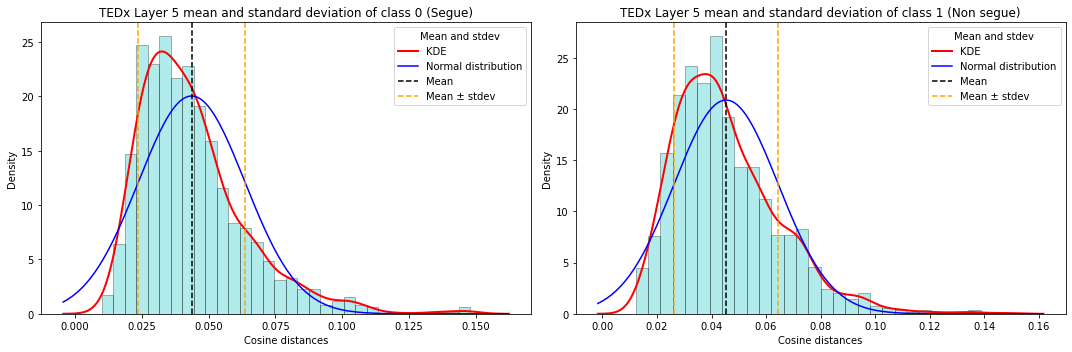

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0447
StDev: 0.0221
Mean: 0.0467
StDev: 0.0216


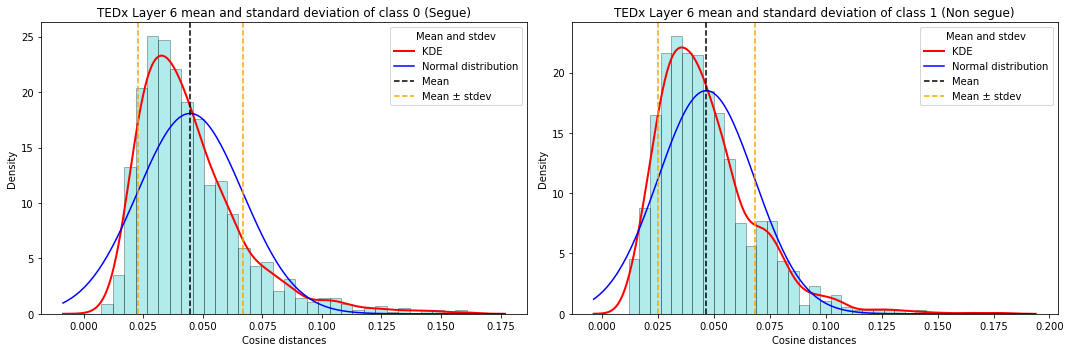

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0507
StDev: 0.0317
Mean: 0.0525
StDev: 0.0297


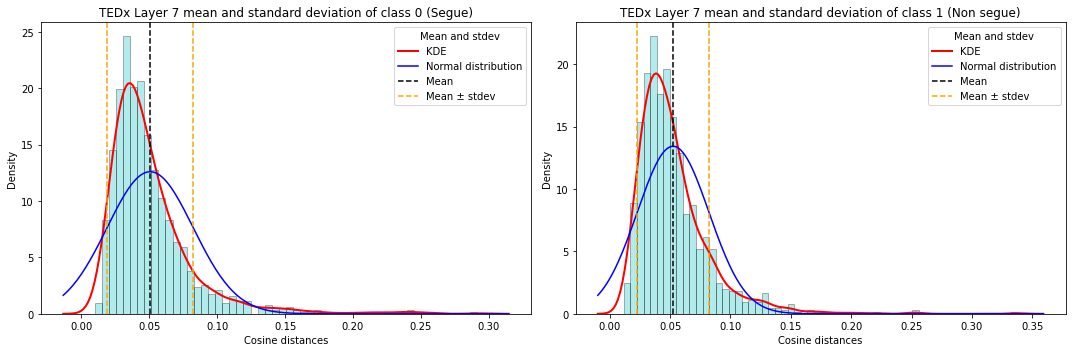

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0657
StDev: 0.0453
Mean: 0.0675
StDev: 0.0410


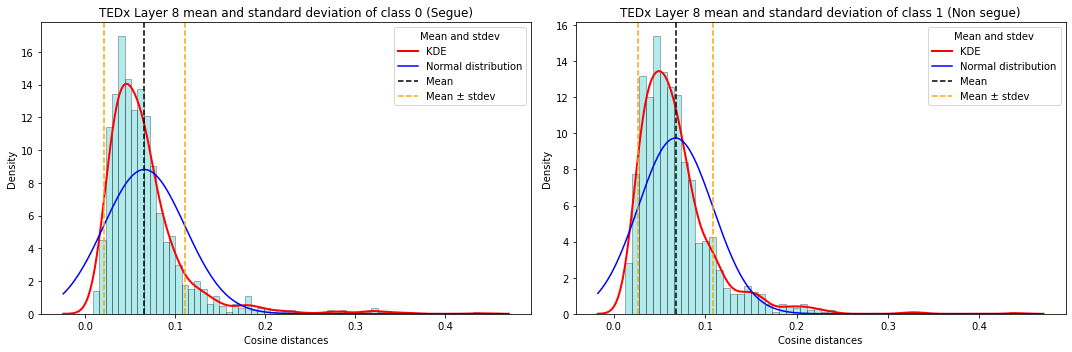

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0840
StDev: 0.0607
Mean: 0.0863
StDev: 0.0543


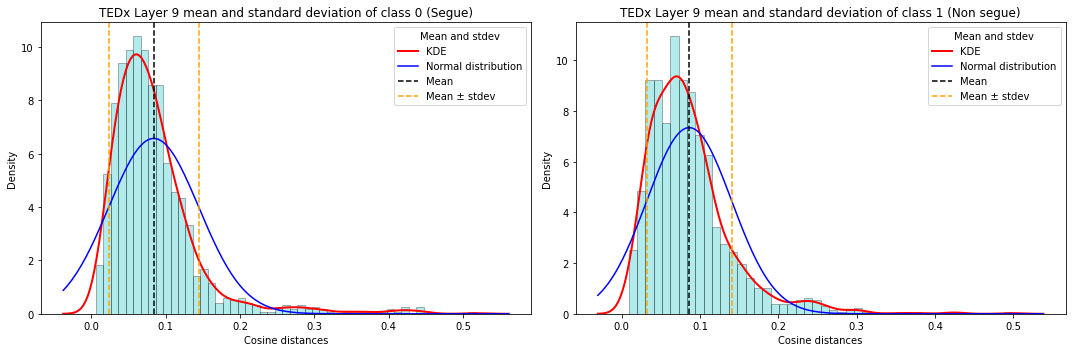

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.1228
StDev: 0.0978
Mean: 0.1265
StDev: 0.0902


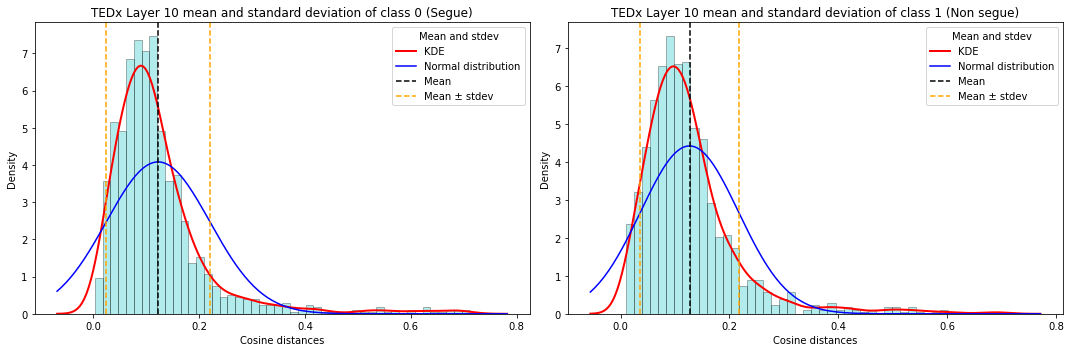

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.1922
StDev: 0.1687
Mean: 0.2042
StDev: 0.1646


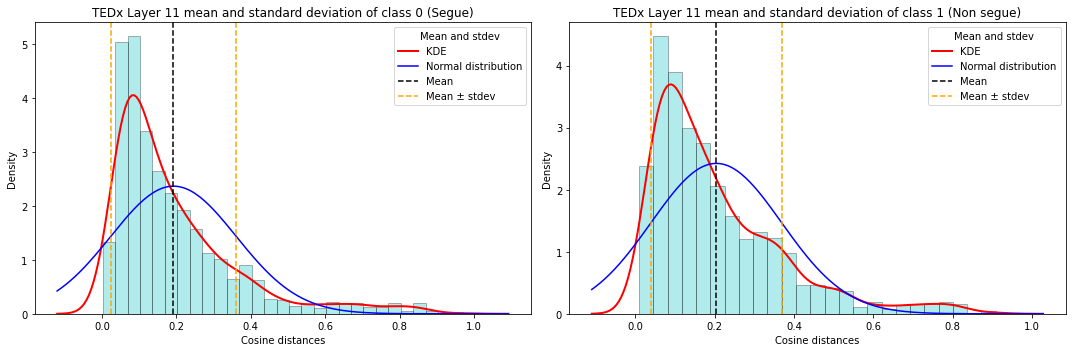

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.2019
StDev: 0.1276
Mean: 0.2151
StDev: 0.1332


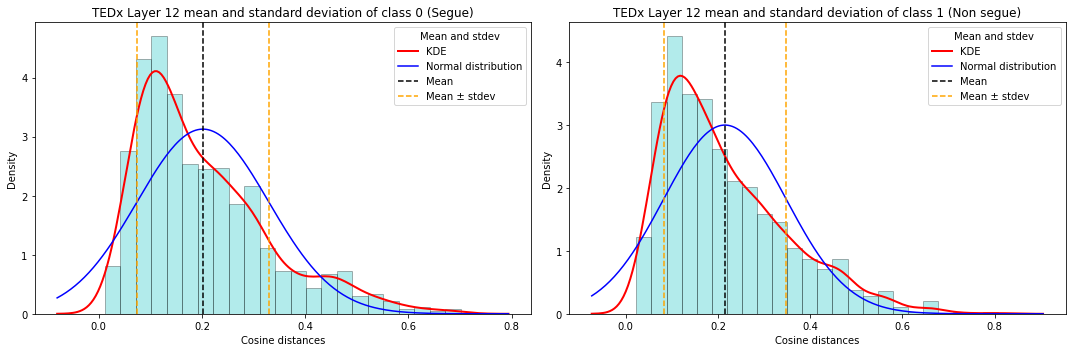

In [35]:
plot_mean_and_stdev(df_dist_5_cosine_distance)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0319
StDev: 0.0150
Mean: 0.0346
StDev: 0.0152


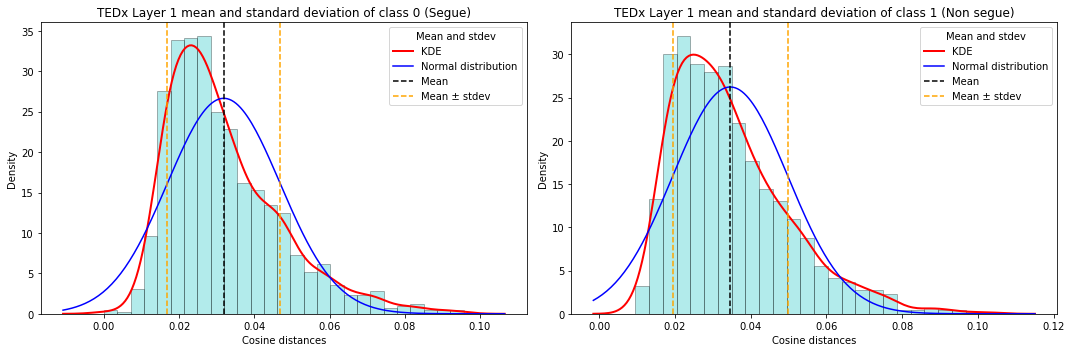

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0498
StDev: 0.0227
Mean: 0.0546
StDev: 0.0225


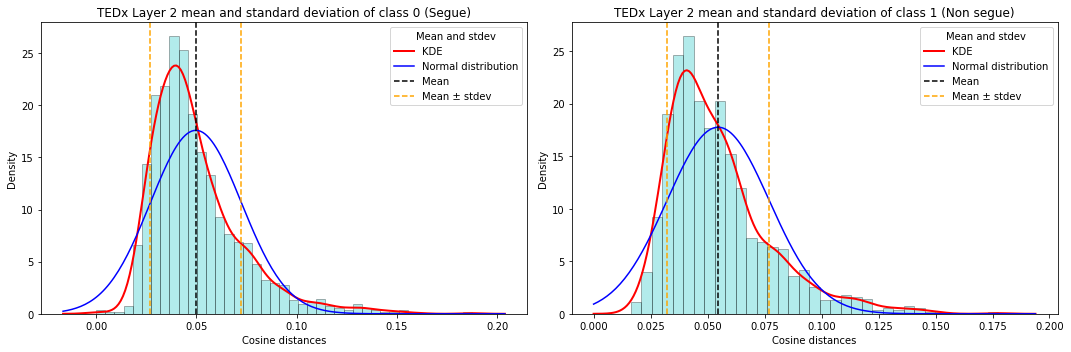

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0531
StDev: 0.0236
Mean: 0.0570
StDev: 0.0235


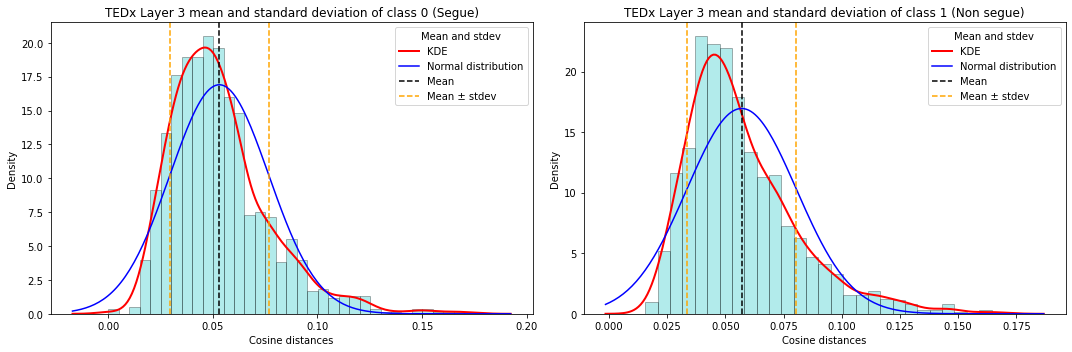

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0392
StDev: 0.0176
Mean: 0.0419
StDev: 0.0174


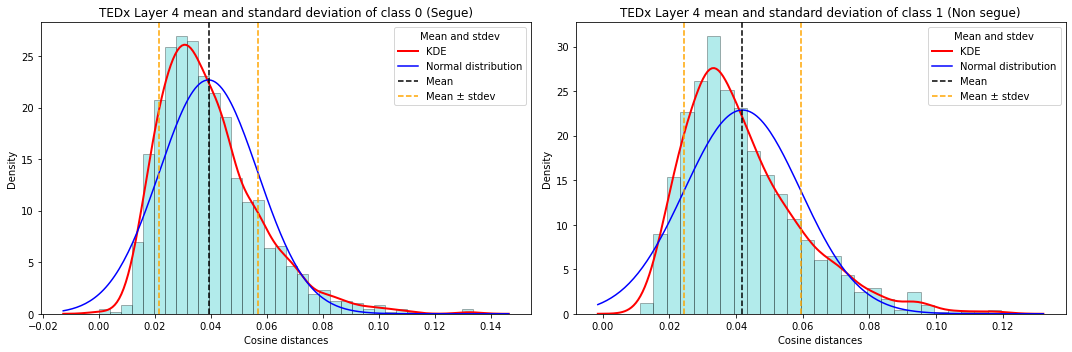

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0439
StDev: 0.0190
Mean: 0.0471
StDev: 0.0194


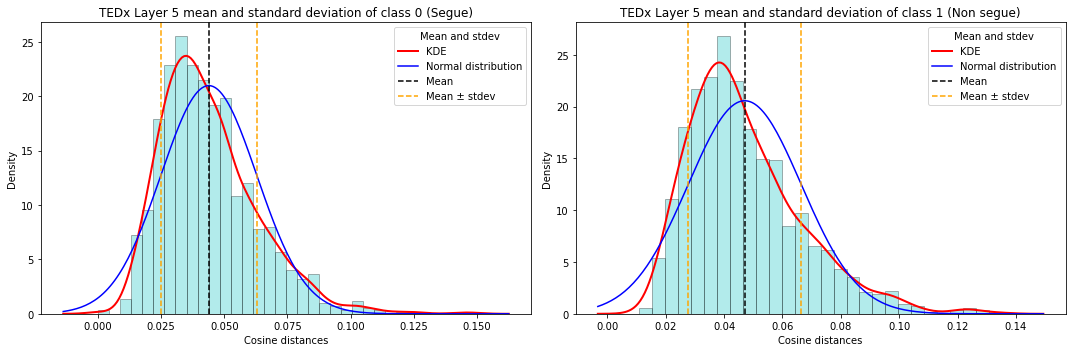

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0452
StDev: 0.0211
Mean: 0.0482
StDev: 0.0216


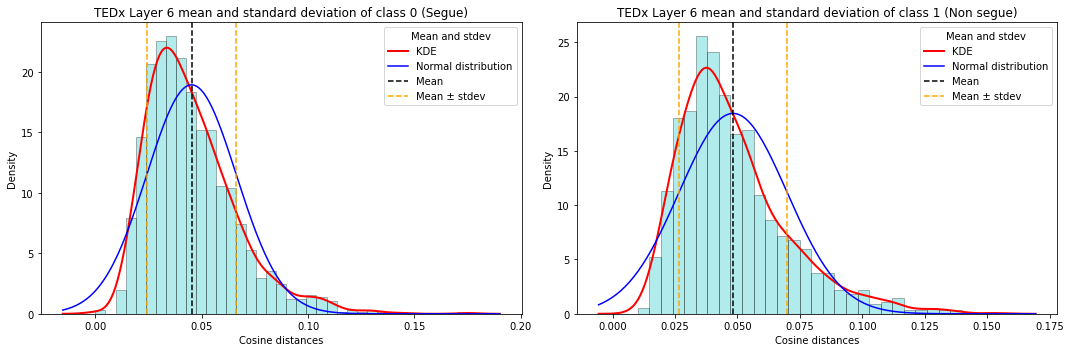

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0507
StDev: 0.0292
Mean: 0.0548
StDev: 0.0319


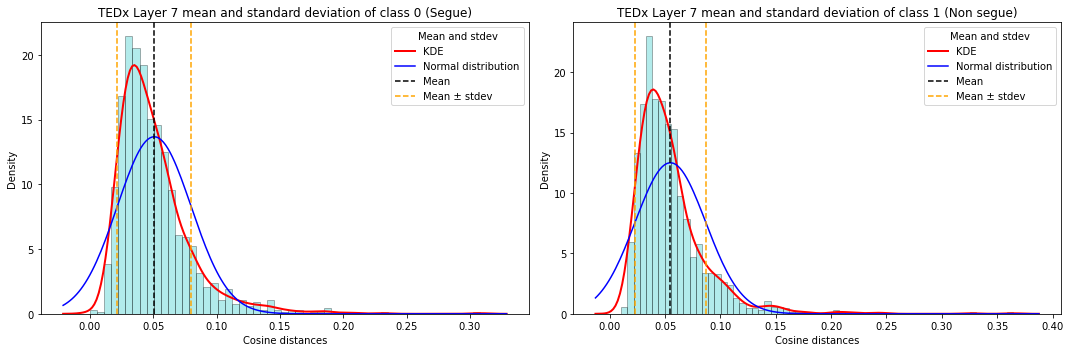

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0657
StDev: 0.0416
Mean: 0.0701
StDev: 0.0444


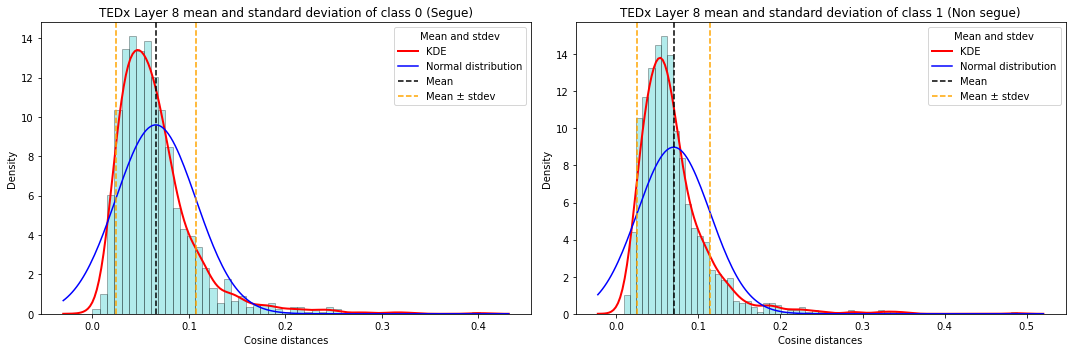

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0840
StDev: 0.0563
Mean: 0.0883
StDev: 0.0583


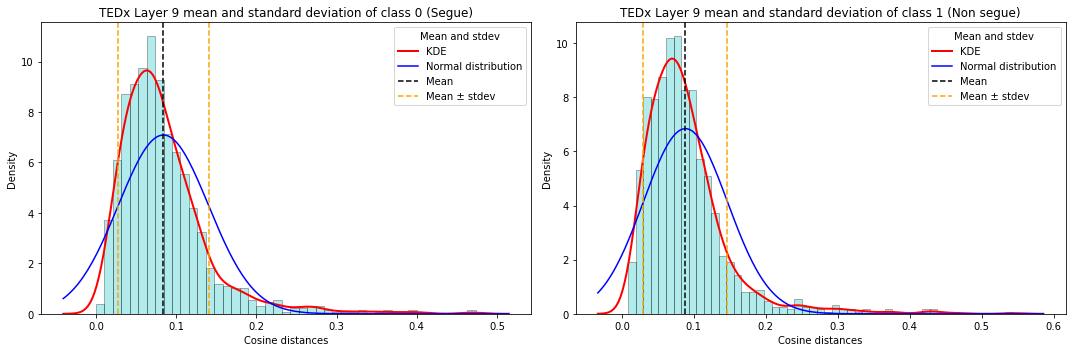

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.1228
StDev: 0.0918
Mean: 0.1282
StDev: 0.0938


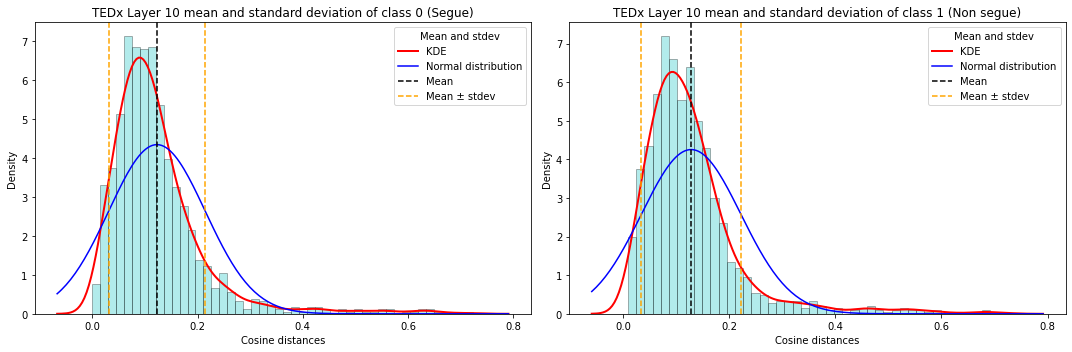

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.1968
StDev: 0.1670
Mean: 0.2085
StDev: 0.1680


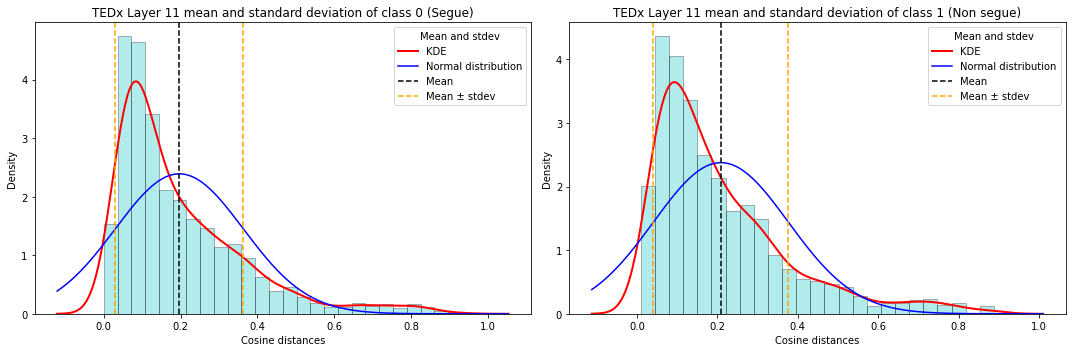

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.2092
StDev: 0.1360
Mean: 0.2219
StDev: 0.1387


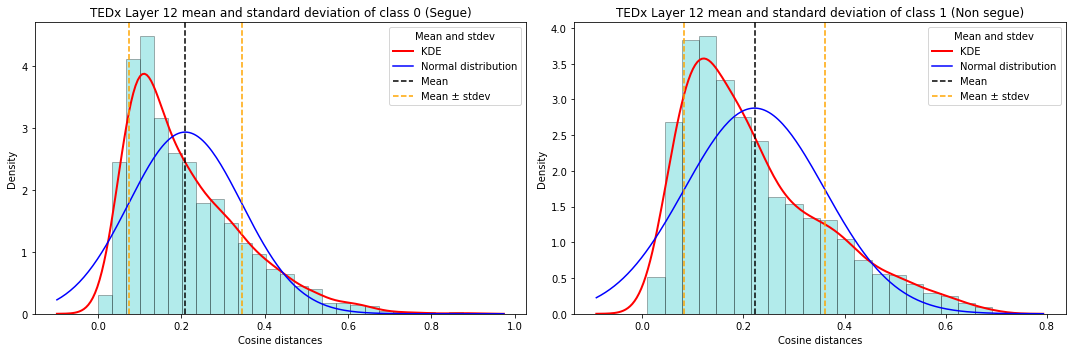

In [36]:
plot_mean_and_stdev(df_dist_10_cosine_distance)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0319
StDev: 0.0150
Mean: 0.0353
StDev: 0.0156


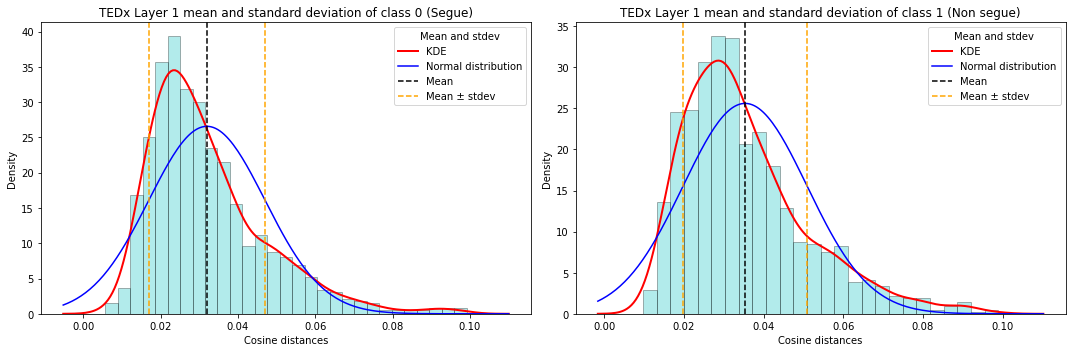

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0498
StDev: 0.0218
Mean: 0.0548
StDev: 0.0225


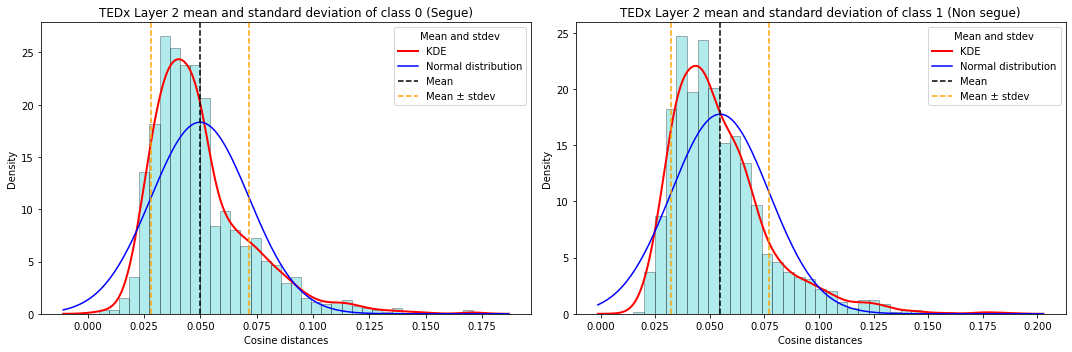

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0527
StDev: 0.0240
Mean: 0.0574
StDev: 0.0234


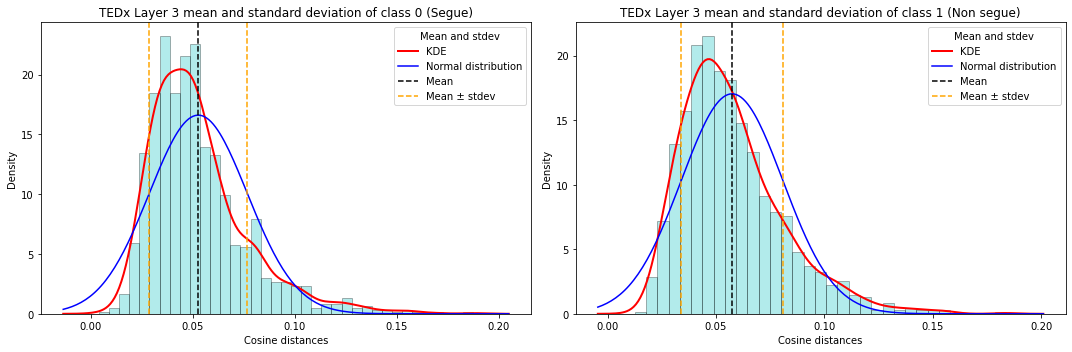

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0389
StDev: 0.0178
Mean: 0.0421
StDev: 0.0174


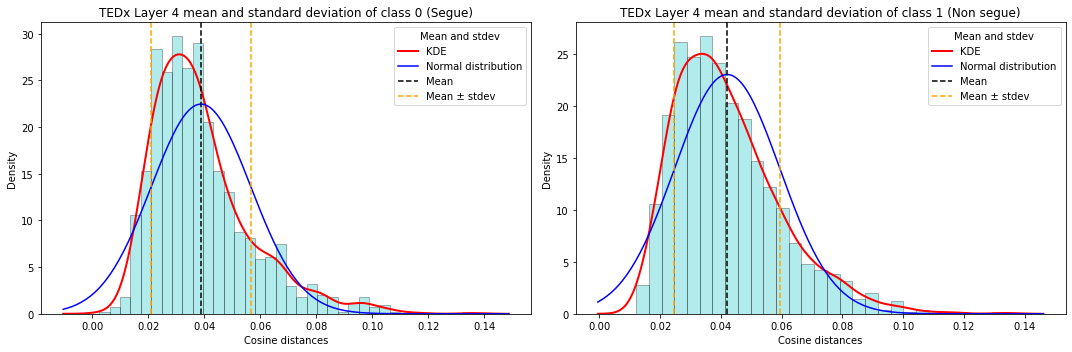

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0439
StDev: 0.0195
Mean: 0.0472
StDev: 0.0193


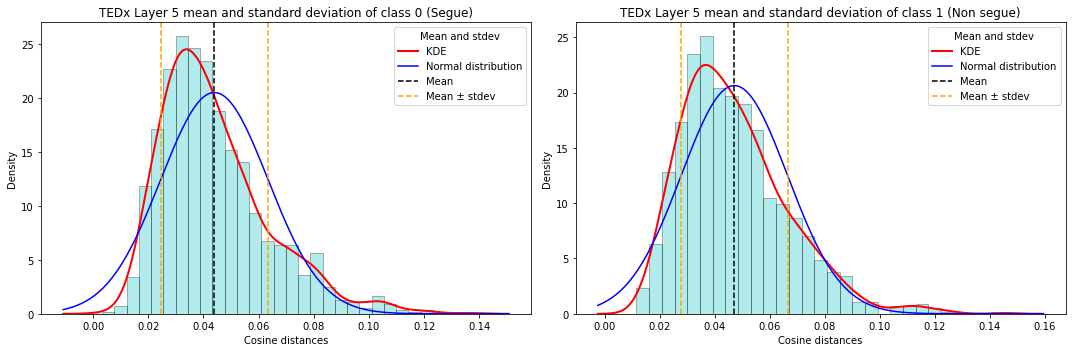

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0452
StDev: 0.0214
Mean: 0.0483
StDev: 0.0221


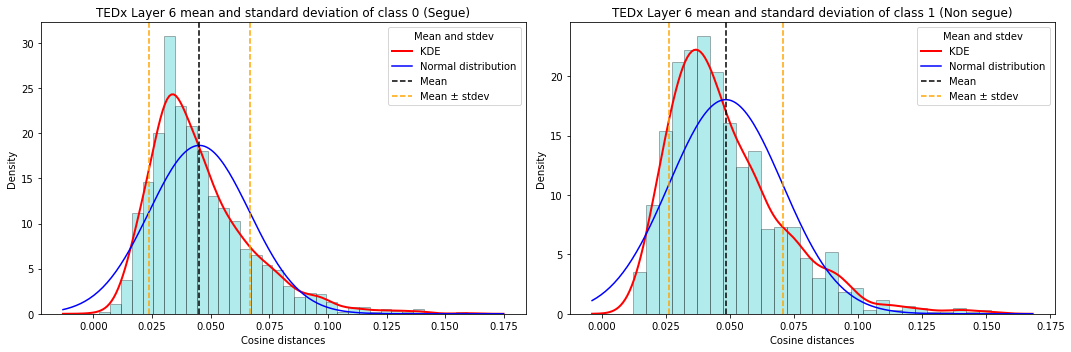

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0517
StDev: 0.0312
Mean: 0.0547
StDev: 0.0305


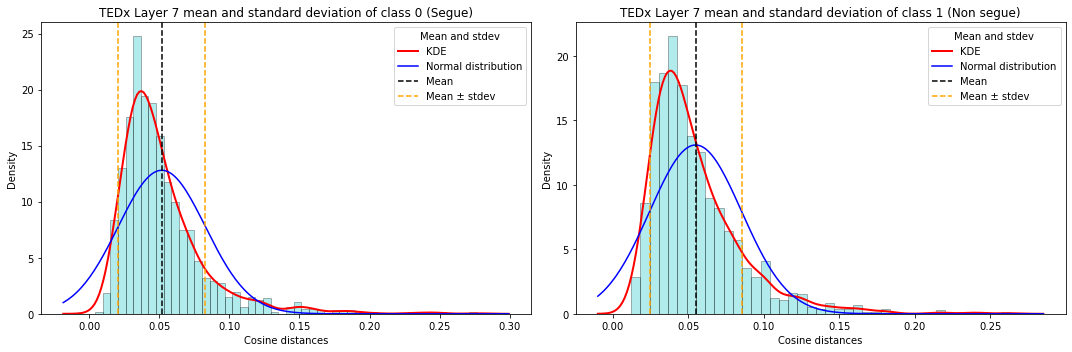

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0670
StDev: 0.0454
Mean: 0.0707
StDev: 0.0443


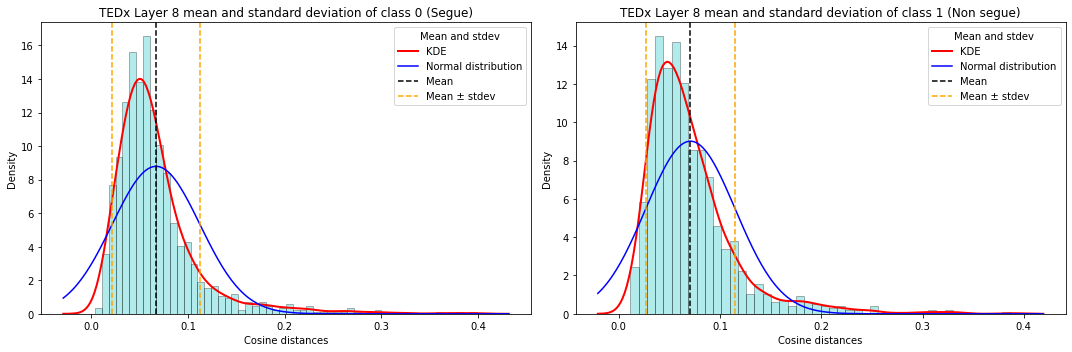

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0855
StDev: 0.0616
Mean: 0.0896
StDev: 0.0591


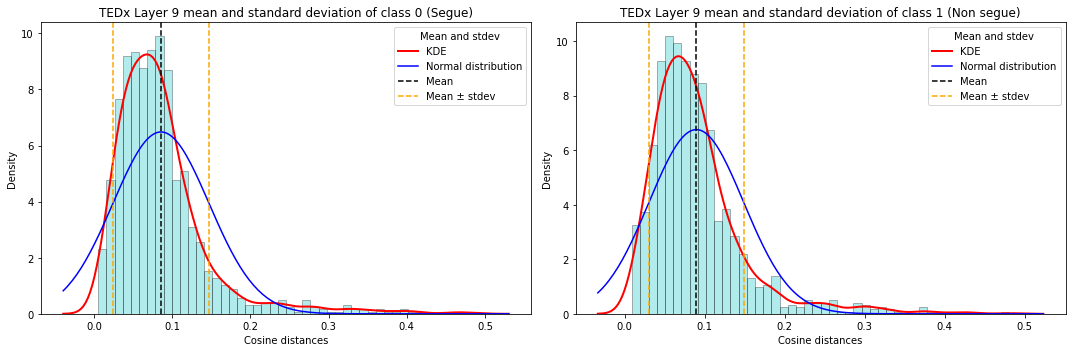

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.1268
StDev: 0.1023
Mean: 0.1317
StDev: 0.0959


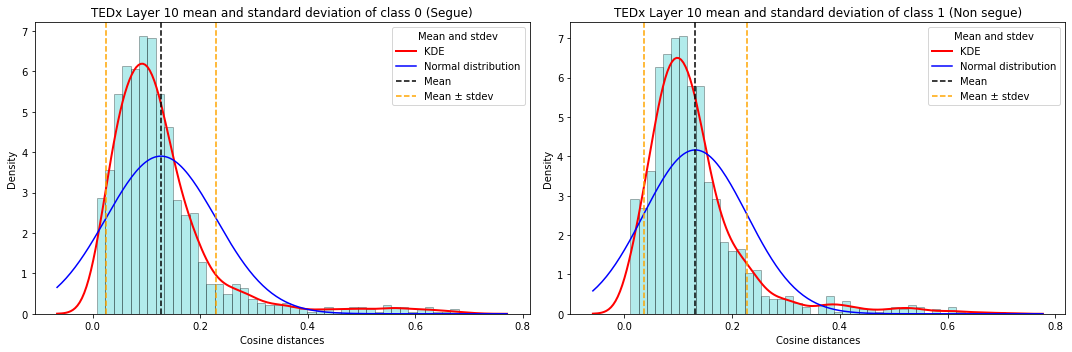

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.2018
StDev: 0.1770
Mean: 0.2132
StDev: 0.1724


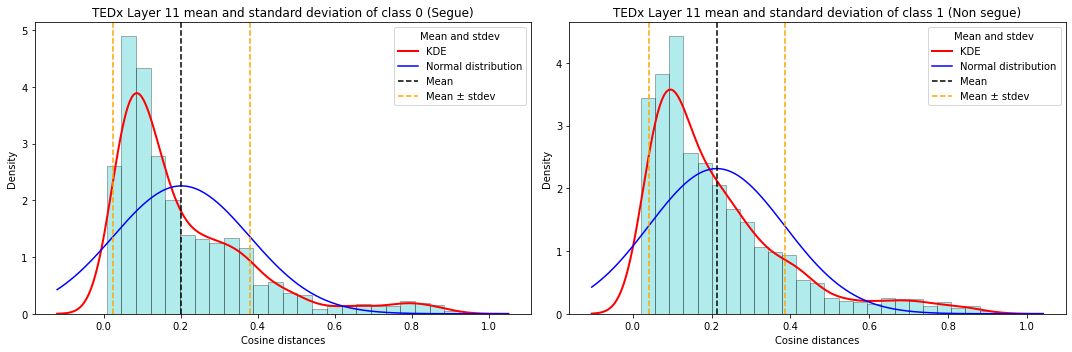

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.2081
StDev: 0.1334
Mean: 0.2234
StDev: 0.1344


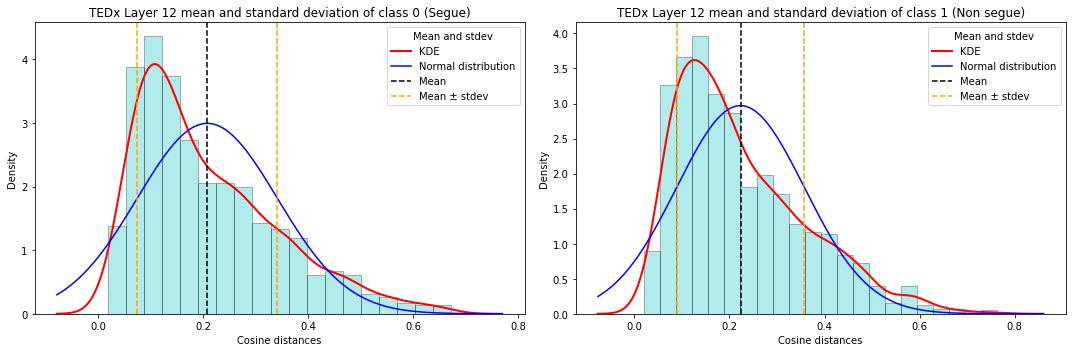

In [37]:
plot_mean_and_stdev(df_dist_20_cosine_distance)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0322
StDev: 0.0157
Mean: 0.0355
StDev: 0.0157


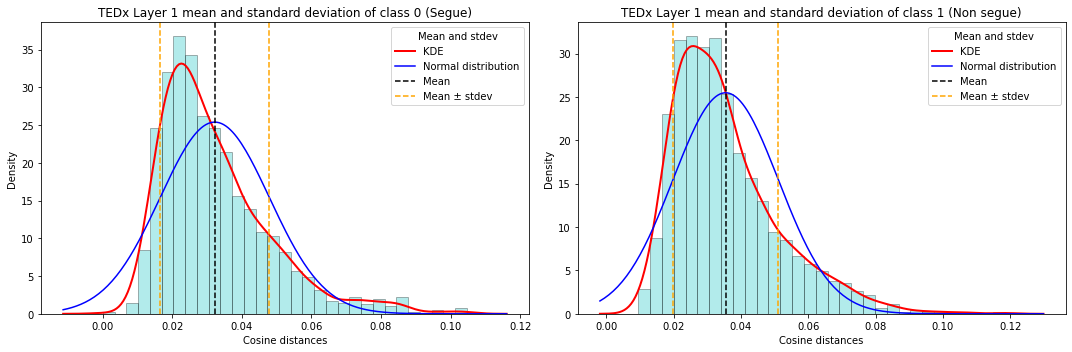

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0502
StDev: 0.0228
Mean: 0.0556
StDev: 0.0229


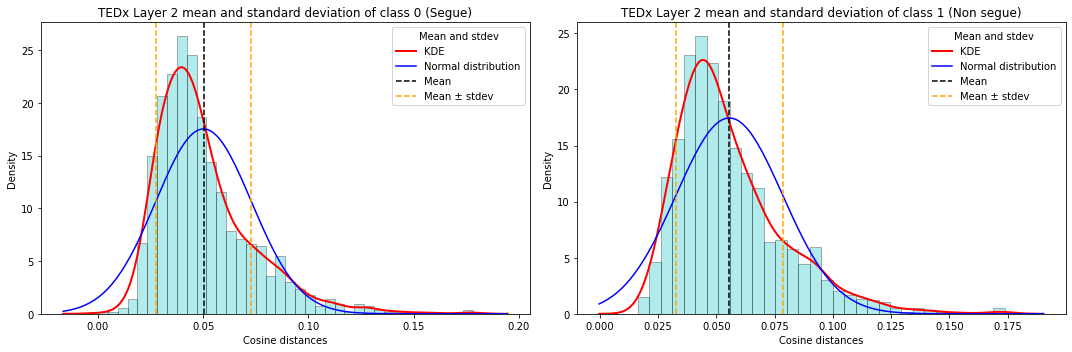

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0535
StDev: 0.0245
Mean: 0.0576
StDev: 0.0241


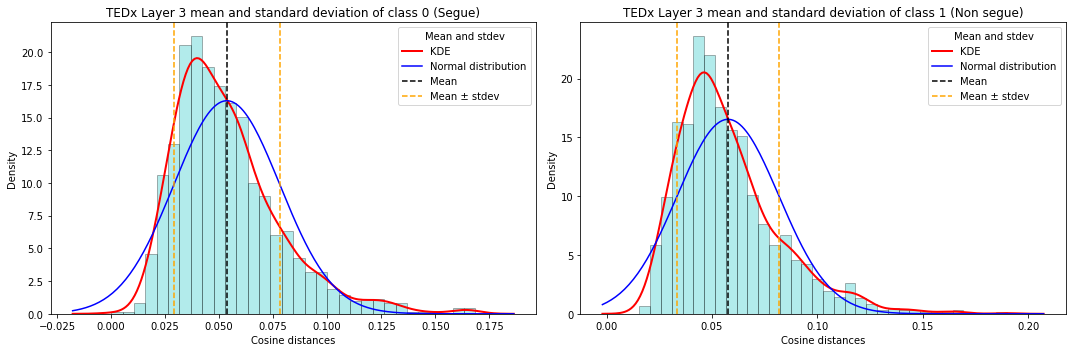

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0394
StDev: 0.0181
Mean: 0.0425
StDev: 0.0179


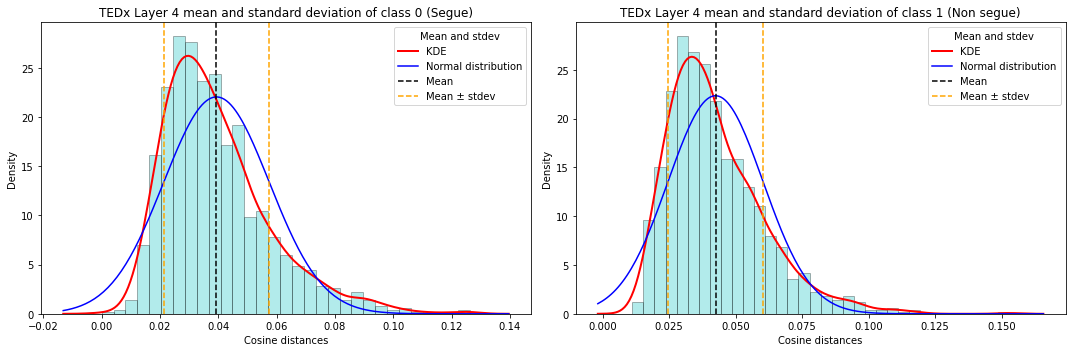

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0443
StDev: 0.0199
Mean: 0.0474
StDev: 0.0198


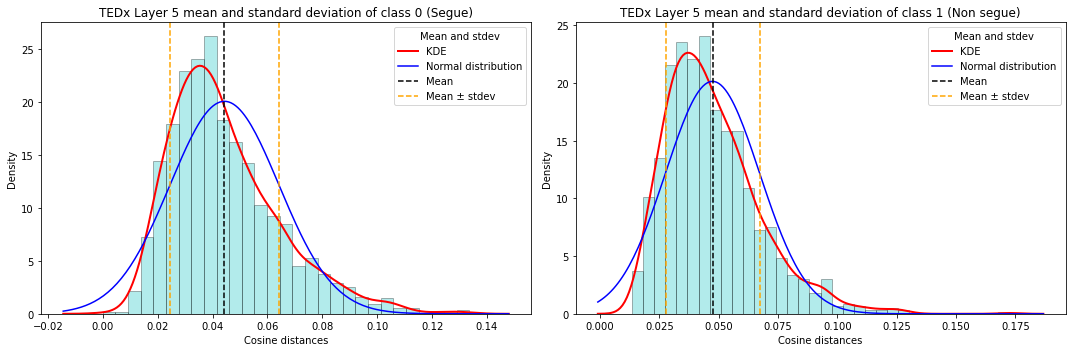

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0455
StDev: 0.0219
Mean: 0.0486
StDev: 0.0220


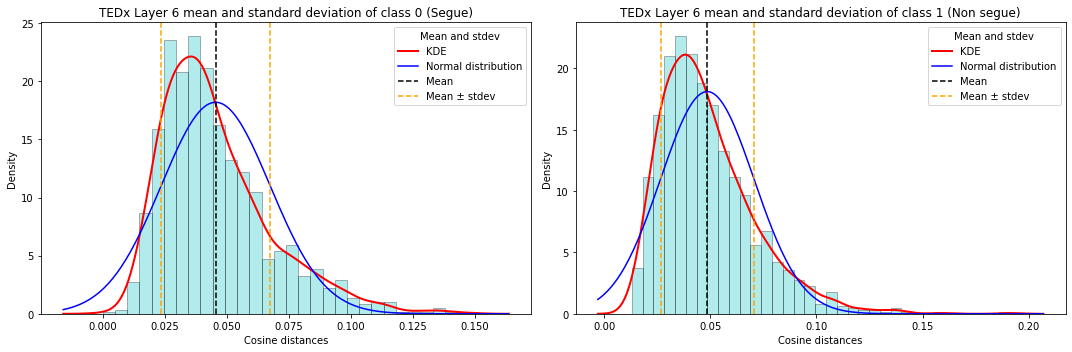

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0518
StDev: 0.0301
Mean: 0.0546
StDev: 0.0303


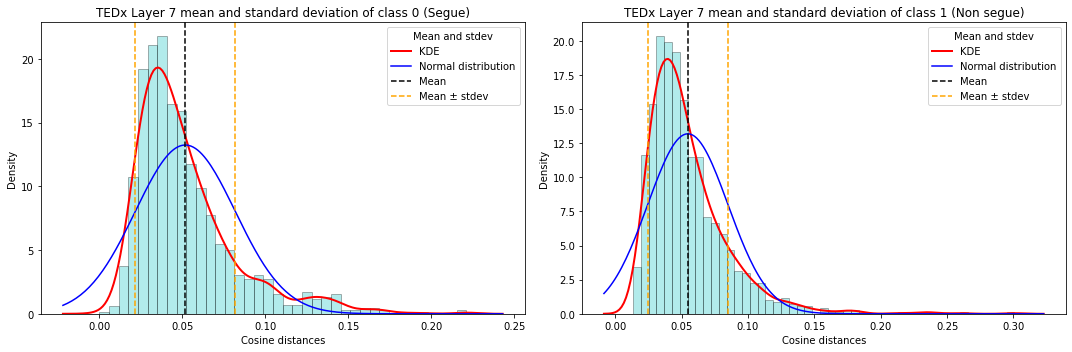

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0680
StDev: 0.0437
Mean: 0.0705
StDev: 0.0434


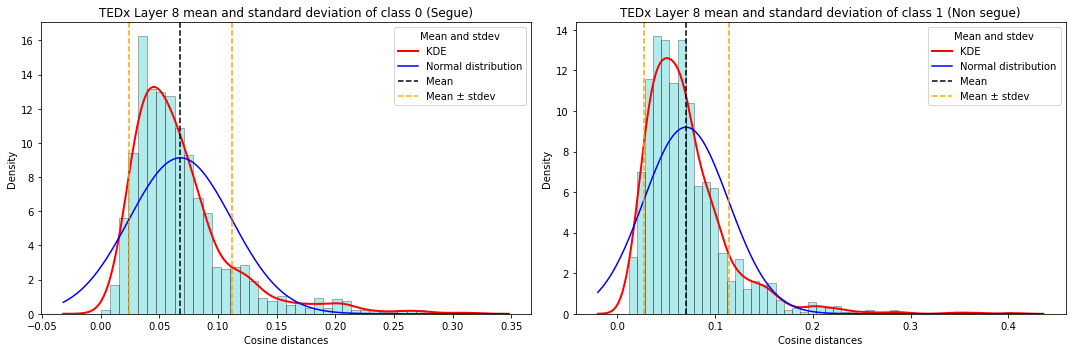

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0872
StDev: 0.0594
Mean: 0.0896
StDev: 0.0578


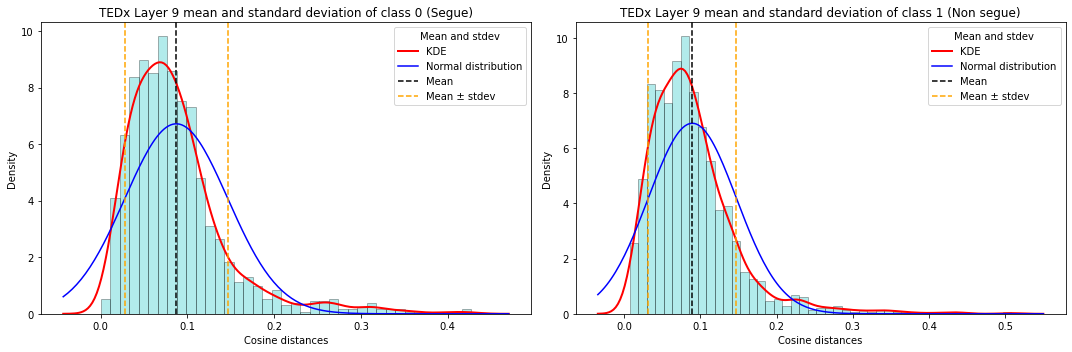

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.1280
StDev: 0.0997
Mean: 0.1296
StDev: 0.0932


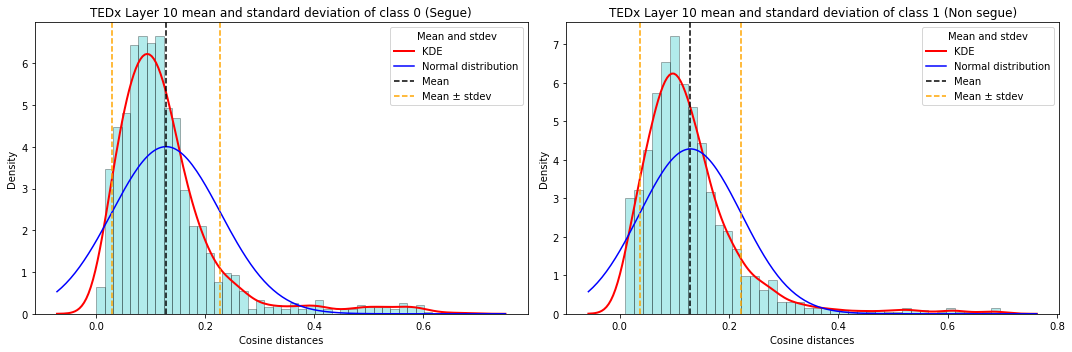

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.1998
StDev: 0.1687
Mean: 0.2077
StDev: 0.1682


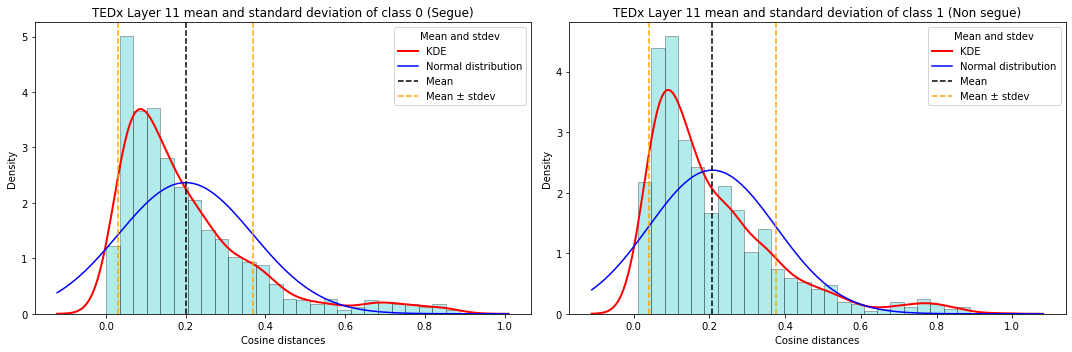

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.2069
StDev: 0.1320
Mean: 0.2214
StDev: 0.1367


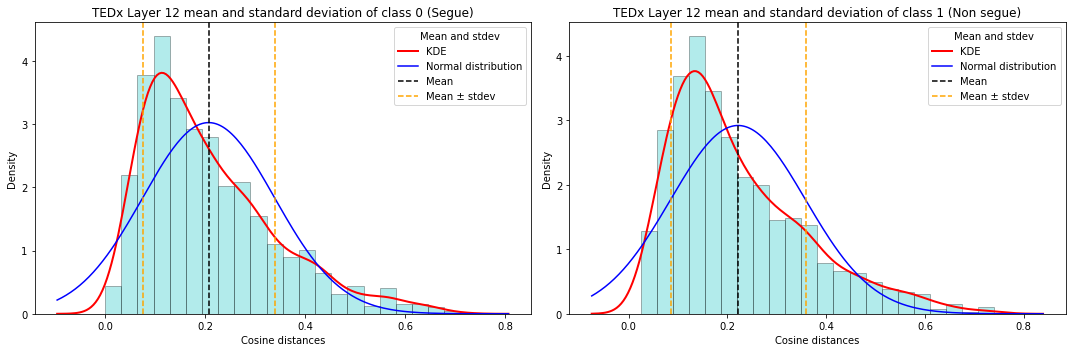

In [38]:
plot_mean_and_stdev(df_dist_30_cosine_distance)

In [39]:
df_cosine_distances_dict['df_dist_5']

{'Cosine_distance_layer_1': {'1': {'Mean': 0.03, 'Standard Deviation': 0.02},
  '0': {'Mean': 0.03, 'Standard Deviation': 0.01}},
 'Cosine_distance_layer_2': {'1': {'Mean': 0.05, 'Standard Deviation': 0.02},
  '0': {'Mean': 0.05, 'Standard Deviation': 0.02}},
 'Cosine_distance_layer_3': {'1': {'Mean': 0.06, 'Standard Deviation': 0.02},
  '0': {'Mean': 0.05, 'Standard Deviation': 0.02}},
 'Cosine_distance_layer_4': {'1': {'Mean': 0.04, 'Standard Deviation': 0.02},
  '0': {'Mean': 0.04, 'Standard Deviation': 0.02}},
 'Cosine_distance_layer_5': {'1': {'Mean': 0.05, 'Standard Deviation': 0.02},
  '0': {'Mean': 0.04, 'Standard Deviation': 0.02}},
 'Cosine_distance_layer_6': {'1': {'Mean': 0.05, 'Standard Deviation': 0.02},
  '0': {'Mean': 0.04, 'Standard Deviation': 0.02}},
 'Cosine_distance_layer_7': {'1': {'Mean': 0.05, 'Standard Deviation': 0.03},
  '0': {'Mean': 0.05, 'Standard Deviation': 0.03}},
 'Cosine_distance_layer_8': {'1': {'Mean': 0.07, 'Standard Deviation': 0.04},
  '0': {'Mea

In [40]:
def plot_distribution_mean_and_sd(df, title, df_name):

    '''
    To apply "hue", seaborn needs the dataframe in "long" form. 
    df.melt() is a pandas function that converts the numeric columns into 2 new columns: 
    - one called "variable" with the old name of the column;
    - one called "value" with the values. 
    The resulting dataframe will be 4 times as long so that "value" can be used for x=, and "variable" for y=
    '''
    figure(figsize=(13, 9), dpi=80)
    df_long = df.melt(id_vars=['Id', 'Class'], value_vars = [col for col in df if 'Cosine' in col])
    print(df_name.title())
    display(df_long)
    ax = sns.boxplot(data=df_long, x="value", y="variable", orient="h", \
                     palette="Set2", hue="Class", hue_order =[1, 0])
    handles, labels = ax.get_legend_handles_labels()
    
    plt.tight_layout()
    plt.title(risorsa + " " + df_name + ' Cosine distances distribution')
    plt.show()
    
    figure(figsize=(13, 9), dpi=80)
    sns.barplot(x = "value", y = "variable",data = df_long, ci = "sd", hue='Class', palette="Set2", hue_order =[1, 0])

    plt.tight_layout()
    plt.title(title)
    plt.show()
    
    print()
    print("-------------------------------------------------------------------------------------------------------------------")
    print()

Df_Dist_5


Id  Class                  variable   value
0       29327      1   Cosine_distance_layer_1  0.0415
1       67142      1   Cosine_distance_layer_1  0.0232
2        9675      0   Cosine_distance_layer_1  0.0289
3       16322      0   Cosine_distance_layer_1  0.0283
4       71604      0   Cosine_distance_layer_1  0.0246
...       ...    ...                       ...     ...
28795  171348      1  Cosine_distance_layer_12  0.0978
28796  180390      0  Cosine_distance_layer_12  0.1913
28797  195372      1  Cosine_distance_layer_12  0.4292
28798   84571      0  Cosine_distance_layer_12  0.0738
28799   16522      0  Cosine_distance_layer_12  0.1800

[28800 rows x 4 columns]

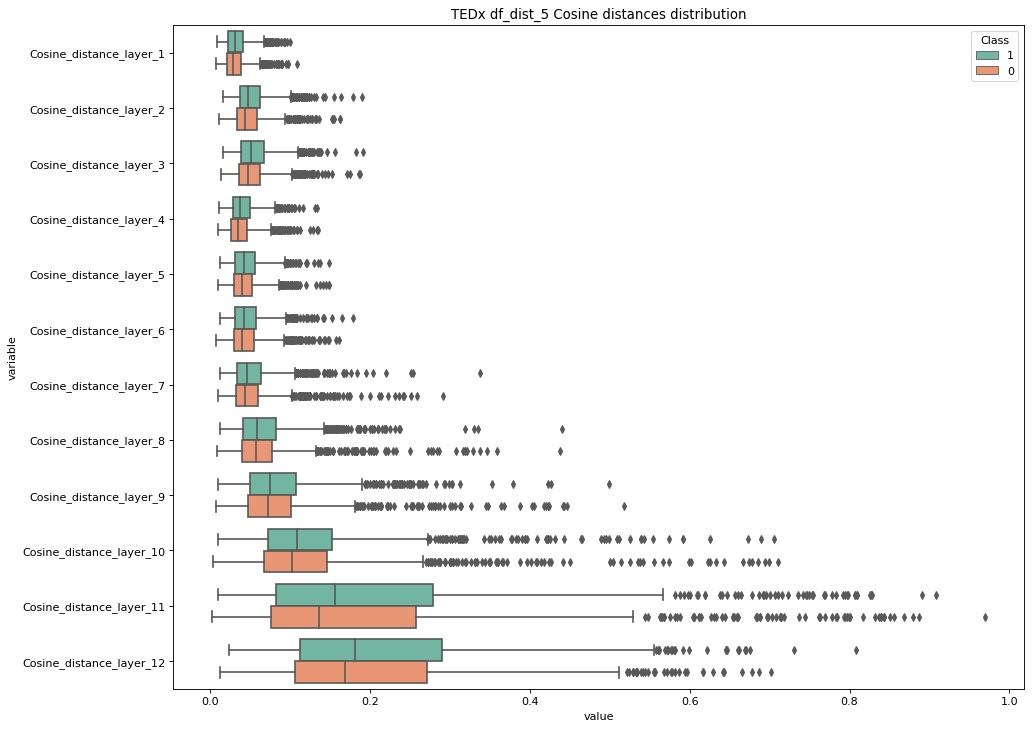

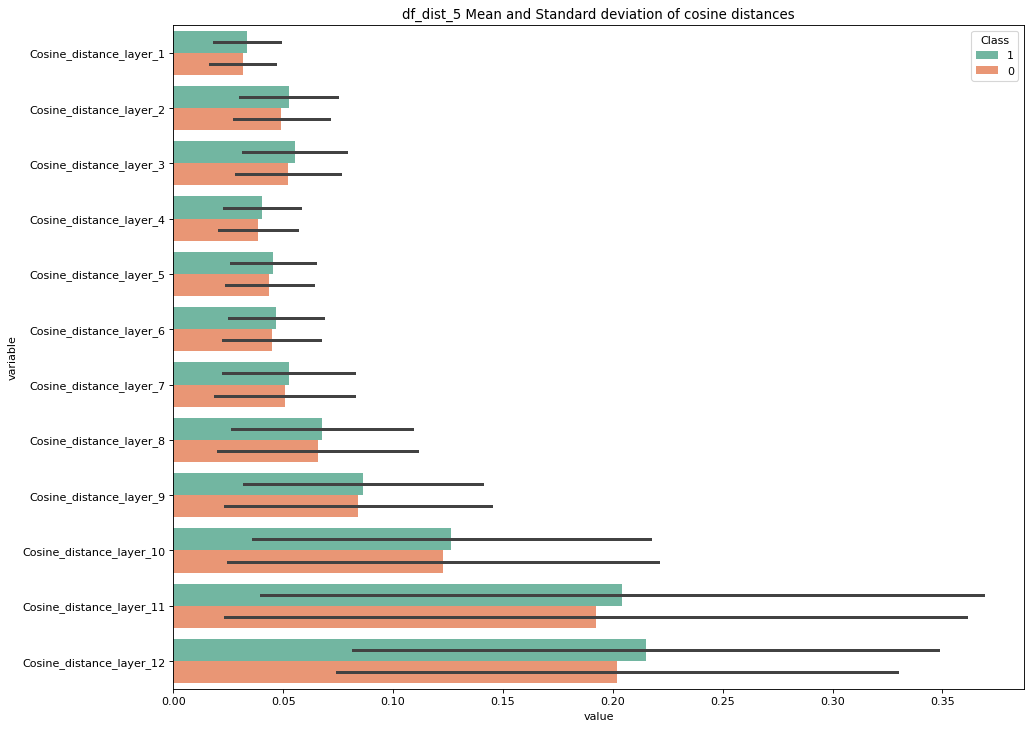


-------------------------------------------------------------------------------------------------------------------

Df_Dist_10


Id  Class                  variable   value
0      187101      0   Cosine_distance_layer_1  0.0139
1       12909      0   Cosine_distance_layer_1  0.0341
2        8370      1   Cosine_distance_layer_1  0.0307
3      166395      1   Cosine_distance_layer_1  0.0246
4      152516      1   Cosine_distance_layer_1  0.0291
...       ...    ...                       ...     ...
28795   46599      0  Cosine_distance_layer_12  0.2652
28796   33169      1  Cosine_distance_layer_12  0.1200
28797  187880      0  Cosine_distance_layer_12  0.5917
28798  120228      1  Cosine_distance_layer_12  0.1492
28799  102370      1  Cosine_distance_layer_12  0.2116

[28800 rows x 4 columns]

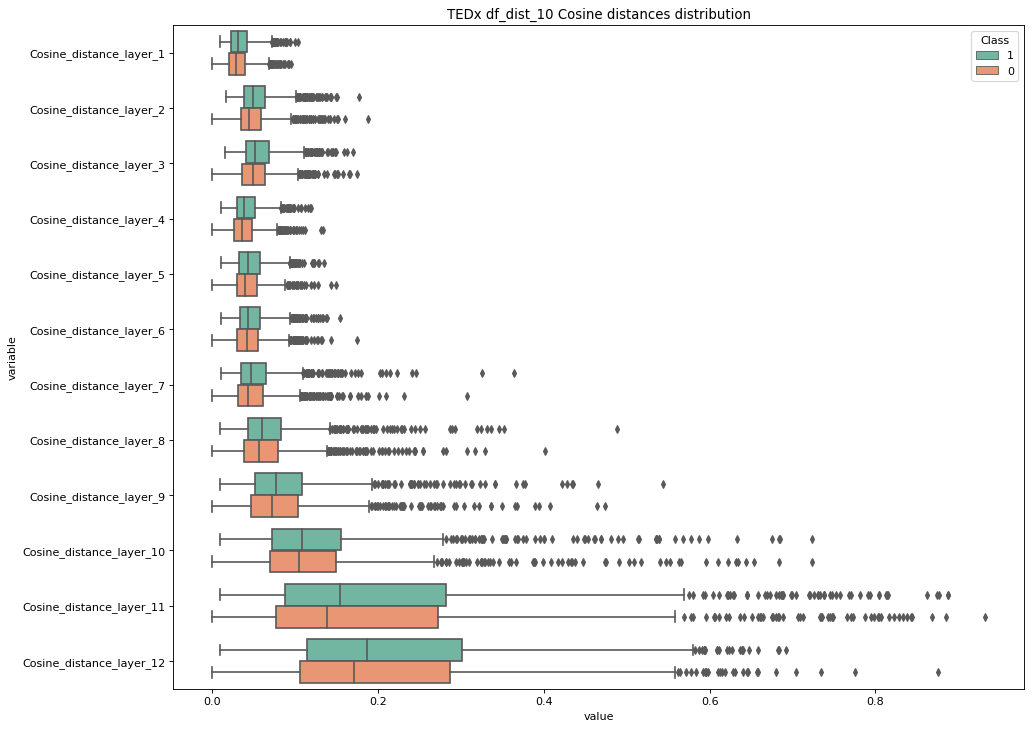

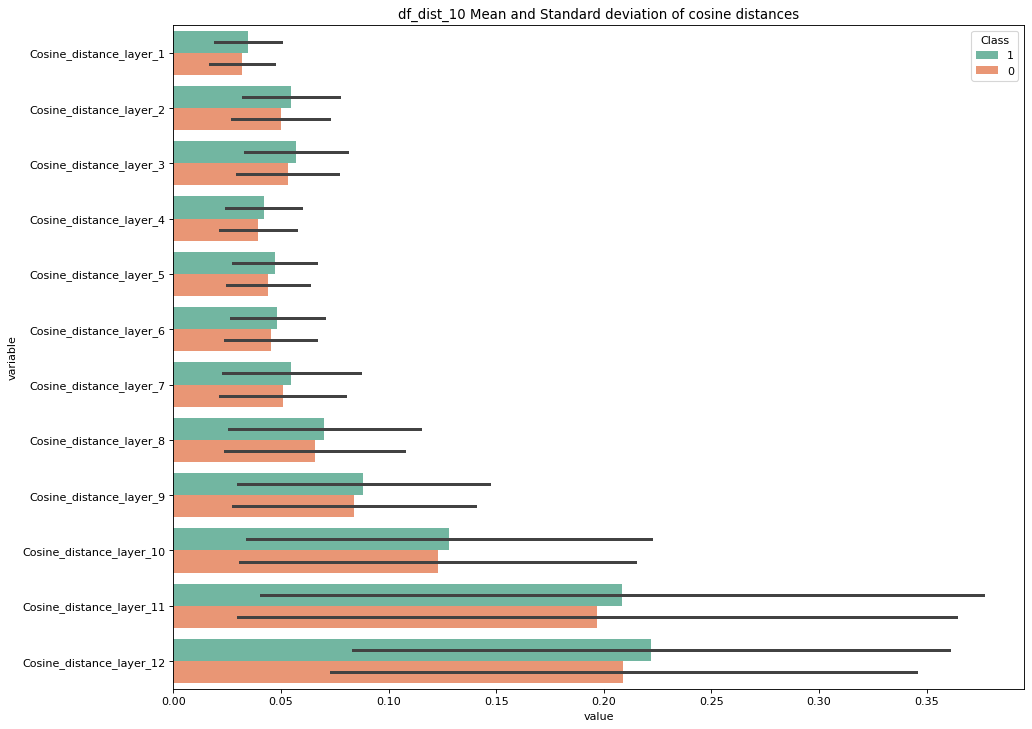


-------------------------------------------------------------------------------------------------------------------

Df_Dist_20


Id  Class                  variable   value
0      147568      1   Cosine_distance_layer_1  0.0335
1      194184      0   Cosine_distance_layer_1  0.0152
2      172450      0   Cosine_distance_layer_1  0.0335
3      152660      0   Cosine_distance_layer_1  0.0288
4        9218      0   Cosine_distance_layer_1  0.0199
...       ...    ...                       ...     ...
28795  106618      0  Cosine_distance_layer_12  0.0870
28796  164120      1  Cosine_distance_layer_12  0.1084
28797   40916      1  Cosine_distance_layer_12  0.3587
28798  182843      1  Cosine_distance_layer_12  0.1937
28799  198572      1  Cosine_distance_layer_12  0.1139

[28800 rows x 4 columns]

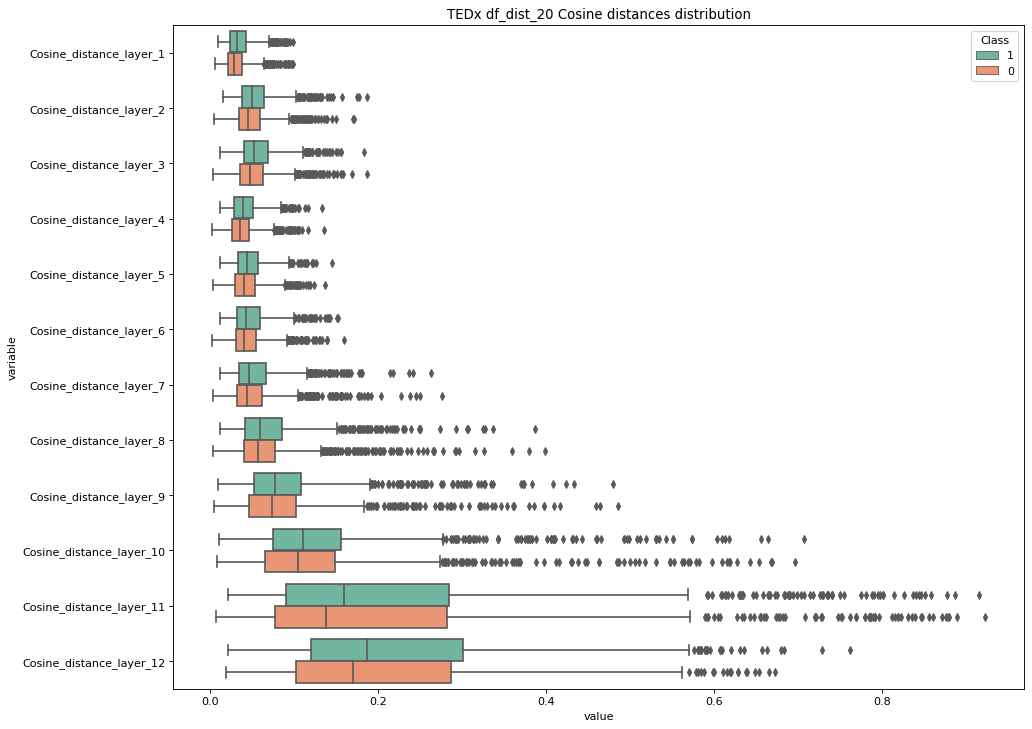

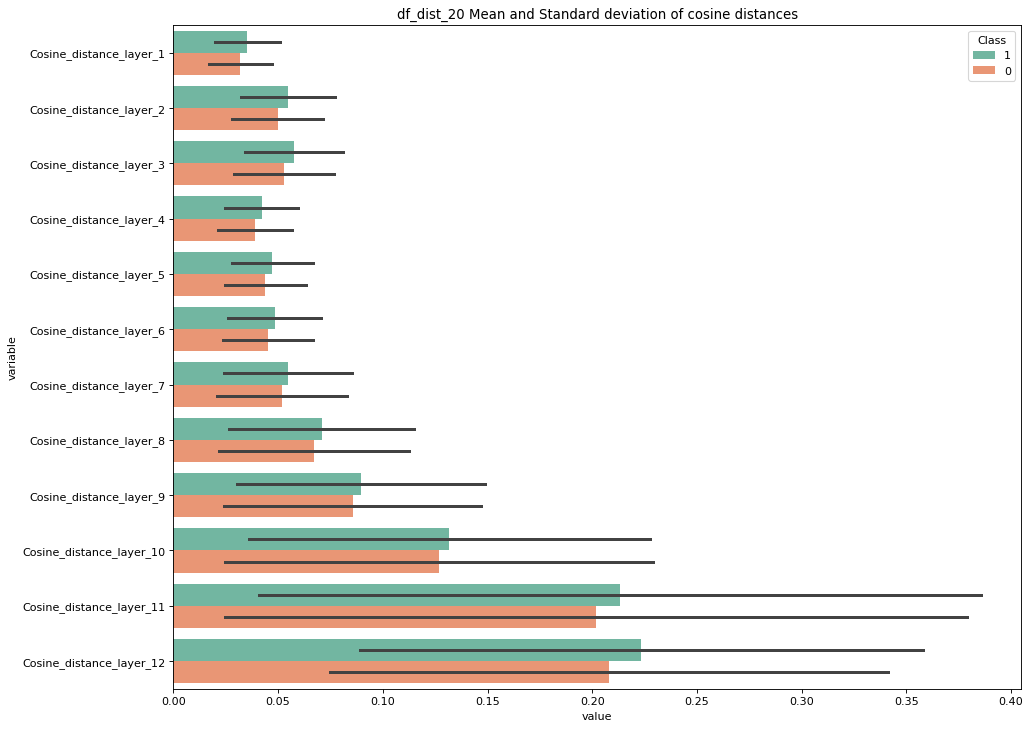


-------------------------------------------------------------------------------------------------------------------

Df_Dist_30


Id  Class                  variable   value
0      194114      1   Cosine_distance_layer_1  0.0370
1       97277      1   Cosine_distance_layer_1  0.0422
2      189770      0   Cosine_distance_layer_1  0.0364
3       17538      0   Cosine_distance_layer_1  0.0306
4       22122      1   Cosine_distance_layer_1  0.0479
...       ...    ...                       ...     ...
28795   43183      1  Cosine_distance_layer_12  0.1390
28796  155307      0  Cosine_distance_layer_12  0.0711
28797  145329      1  Cosine_distance_layer_12  0.1464
28798  148226      1  Cosine_distance_layer_12  0.0243
28799   28789      0  Cosine_distance_layer_12  0.2442

[28800 rows x 4 columns]

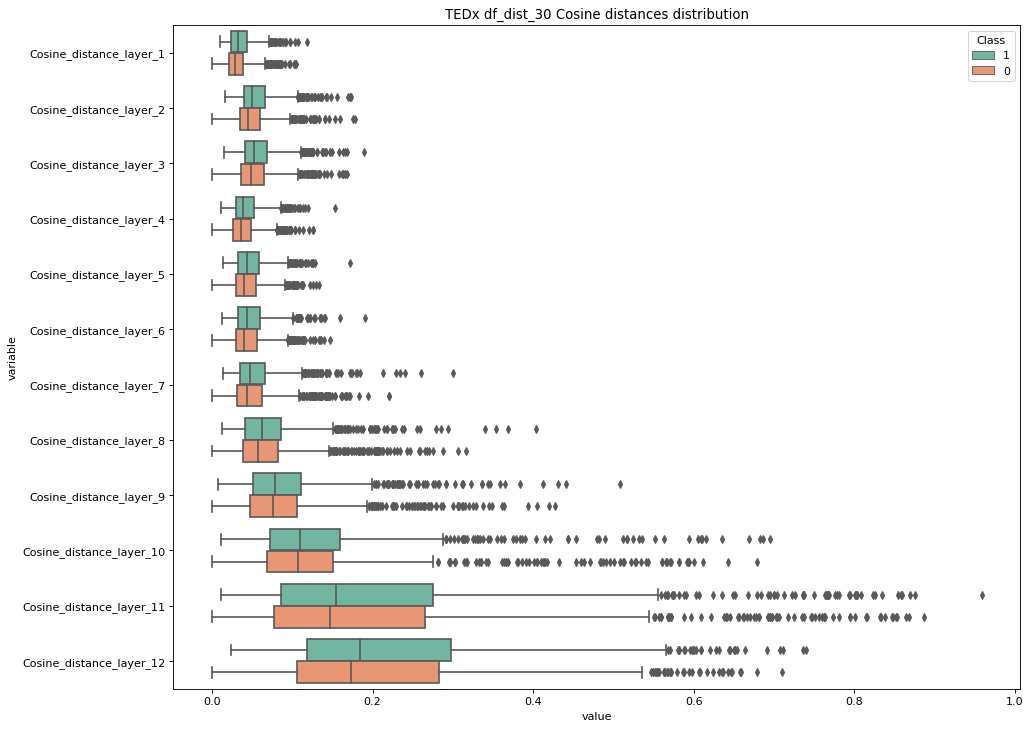

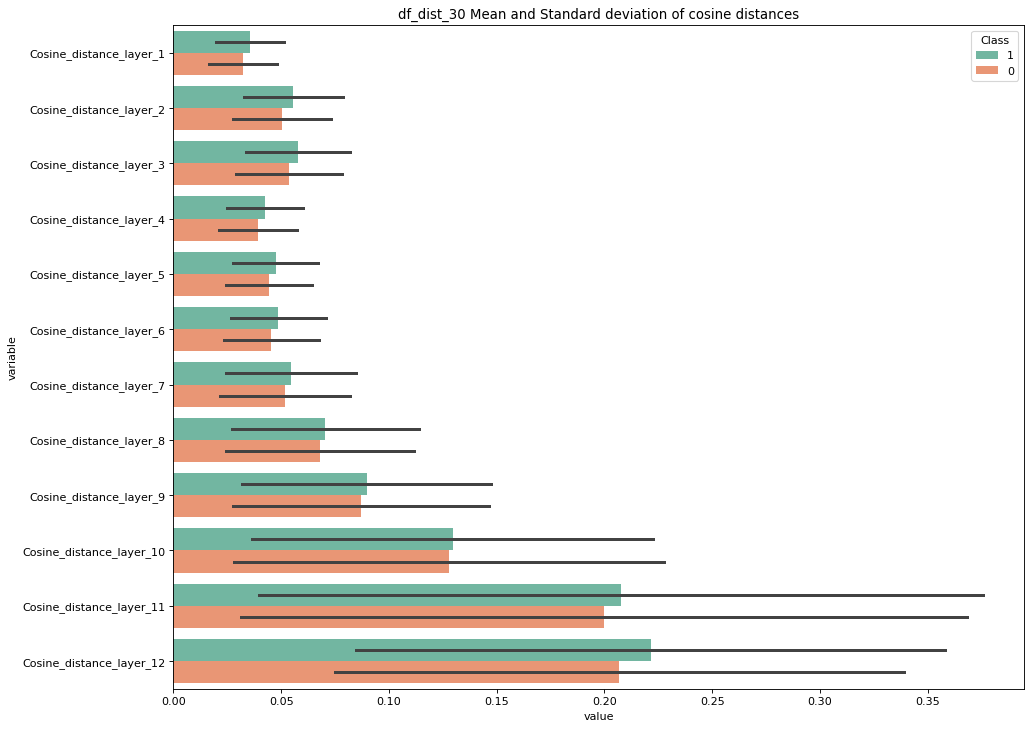


-------------------------------------------------------------------------------------------------------------------



In [41]:
for df, df_name in zip(list_of_df, list_of_names):
    plot_distribution_mean_and_sd(df, df_name + ' Mean and Standard deviation of cosine distances', df_name)